# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="120" />
**Actividad de Grado II**<br>
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2024-1**<br>
**Estudiantes:** Maira Alejandra Ocampo Rámirez, Nathalie Ñañez, Edickson Giraldo Sánchez <br>


---

<div align="center"><b><font size="+2">Detección, gestión y predicción de complicaciones en pacientes hipertensos y diabéticos de la E.S.E. Salud Pereira</font></b></div>

# **Resumen**

>> La E.S.E. Salud Pereira busca mejorar la detección y atención de pacientes crónicos, especialmente aquellos con diabetes e hipertensión, en servicios de urgencia. Actualmente, la identificación de estos pacientes es insuficiente, lo que lleva a una atención mayormente reactiva. El proyecto tiene como meta central utilizar ciencia de datos para desarrollar modelos predictivos que mejoren la identificación temprana de pacientes críticos, facilitando intervenciones proactivas y personalizadas. Esto no solo permitirá una mejor gestión de pacientes crónicos sino también una reducción de eventos adversos graves. Con una base de 4.995 pacientes tratados por estas condiciones y con un promedio de 815 ingresos mensuales a urgencias, el proyecto también busca incorporar a nuevos pacientes en las rutas de atención de hipertensión y diabetes, mejorando la cobertura y seguimiento. A través de la estratificación de riesgos basada en análisis de datos, se espera optimizar la atención y reducir complicaciones, transformando el enfoque de atención en la E.S.E. Salud Pereira hacia uno más preventivo y eficiente.

## **OBJETIVOS**

>**OBJETIVO GENERAL.**
Detectar, gestionar y predecir complicaciones en pacientes hipertensos y diabéticos de la E.S.E. Salud Pereira.

>**OBJETIVOS ESPECÍFICOS.**
> 1. Detectar, mediante análisis de datos, nuevos pacientes con diagnósticos relacionados con las patologías objetivo y que aún no están en las rutas de atención.

> 2. Gestionar los motivos de ingreso de los pacientes crónicos con hipertensión y/o diabetes que acuden a servicios de urgencias, para identificar si existe relación con su enfermedad de base.

> 3. Predecir eventos adversos a través de la identificación de factores de riesgo en pacientes crónicos, mediante la aplicación de técnicas estadísticas y modelos predictivos.


<div align="center"><b><font size="+2">1. Detectar, mediante análisis de datos, nuevos pacientes con diagnósticos relacionados con las patologías objetivo y que aún no están en las rutas de atención.</font></b></div>


---
##   **1.1 🛠️  Preparación del entorno**
---

In [1]:
import csv
import os
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from pathlib import Path
import chardet


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## **1.2 📚 Bases de datos**
---

**➤ Base de datos de usuarios**

> La base de datos de usuarios está compuesta por los siguientes campos: Tipo Identif usuario,	No. Identific,	Cod. A.R.S - E.P.S,	Tipo de Usuario,	1er. Apellido,	2do. Apellido,	1er. Nombre,	2do. Nombre,	Edad,	Unidad medida edad,	Sexo,	Cod. Dpto Residencia,	Cod. Mcpio residencia,	Zona Residencia.

**➤ Base de datos de usuarios de ingreso a urgencias**

> La base de datos de ingreso a urgencias está compuesta por los siguientes campos: No. Fact, Cod. P.S.S, Tipo Identif usuario, No. Identific, Fecha ingreso, Hora ingreso, No. Autoriz, Causa Externa, Dx Egreso, Dx-1 relacionado Egreso, Dx-2 relacionado Egreso, Dx-3 relacionado egreso, Destino Usuario, Estado a la salida, Causa Básica Muerte, Fecha egreso, Hora egreso.

**➤ Base de datos de usuarios de ruta cardiováscular**

> La base de datos de de pacientes de la ruta cardiováscular está compuesta por los siguientes campos: Upss, Centro De Costos, Centro Atencion, Codigo Ips, Aseguradora, Regimen, Fecha Ingreso, Numero Identificación, Fecha de Registro, Tipo dni Usuario, Numero Identificación, Primer Nombre, Segundo Nombre, Primer Apellido, Segundo Apellido, Fecha Nacimiento, Genero, Edad, Forma Edad, Grupo de Edad, Estado Civil, Lugar Nacimiento, Ciudad Vive, Barrio, Direccion, Zona, Telefono, Celular, Email, Etnia, Escolaridad, Profesion, Grupo, Nivel Salarial, Tipo Usuario, Tipo de discapacidad, Grado discapacidad, Raza Negra, Tabaquismo, Alcoholismo, Actividad Fisica, Antecedentes IAM, Falla Renal Cronica (Tasa De Filtracion Glomerular 0-30), Historia Familiar De Enfermedad Cardiaca Prematura (Primer Grado)?, Fecha Diagnostico de Hipertension, Fecha Diagnostico Diabetes, Peso, Estatura, IMC, Perimetro Abdominal, PAS, PAD, HTA, Fecha HTA, HTA-Controlada, DM-Controlada, DM, Fecha DM, Tipo de DM, ERC, Estadio ERC, Creatinina (Mg/Dl), Fecha Creatinina), HBA1C, Fecha HBA1C, Albuminuria, Fecha Albuminuria, Albuminuria / Creatinina, Fecha albuminuria/creatinina, Colesterol total, Fecha colesterol total, HDL, Fecha HDL, LDL, Fecha LDL, Tasa De Filtración Glomerular (MDRD), % De Riesgo Corregido Para Colombia, Clasificación Riesgo Cardiovascular, Dislipidemia, IRC Estadio 3 En Adelante (Tfg Menor De 60), ECV, Enfermedad Arterial Oclusiva Cronica, Enfermedad Cardiaca Isquemica, Insuficiencia Cardiaca, Retinopatía, Neuropatía, Medicamentos: Enalapril, Medicamentos: Losartan, Medicamentos: Metformina, Medicamentos : Insulina, Remision: Medicina Interna, Remision: Oftalmologia, Remision: Neurologia, Remision: Nutricion, Remision: Psicologia, Demanda Inducida A Salud Oral, Demanda Inducida A Optometria, Atendido Por: Medicina Interna, Atendido Por: Oftalmologia, Atendido Por: Neurologia, Atendido Por: Nutricion, Atendido Por: Psicologia, Id Salud Oral, Id Optometria, Adherencia, N? Actividades educativas asistidas en el ultimo Anio, Estado, DX Principal, Tipo diagnostico, Diagnostico Principal, DX Relacionado 1, Tipo De Diagnostico, Diagnostico Relacionado 1, DX Relacionado 2, Tipo De Diagnostico, Diagnostico Relacionado 2, Profesional Que Registra, Nombre Del Profesional.

>> La estructura general y el diccionario de las bases de datos se encuentra en el **informe de fase**.

### **1.2.1. Variables**

Policonsultantes: Ingresan 3 veces o más dentro de un mismo mes (No se puede eliminar los duplicados de la base de datos AU)

**us_df:** Dataframe de usuarios

**au_df:** Dataframe de usuarios que ingresaron a servicios de urgencia

**data_corregida_us:** Dataframe de usuarios con correcciones de datos

**dx_df:** Dataframe de diagnósticos objetivo

**au_dx_obj:** Usuarios que ingresaron a servicios de urgencias con diagnósticos objetivo.

**au_dx_obj_sd:** Usuarios que ingresaron a servicios de urgencias con diagnósticos objetivo sin duplicados.

**us_au_dx_obj:** Usuarios que ingresaron a servicios de urgencias con diagnósticos objetivo.

**ingresos_rcv:** Usuarios que se encuentran registrados en la ruta de atención cardiováscular.

**pacientes_sin_ruta:** Usuarios que ingresaron a servicios de urgencias con diagnósticos objetivo que no se encuentran en la ruta de atención

**au_dx_merge_ingresos_rcv:** Unión entre los ingresos a urgencias por diagnósticos relacionados y los registros de usuarios de la ruta cardiováscular (Esta variable solo se utiliza para posteriormente realizar una agrupación por el número de id del paciente y así obtener la cantidad total de ingresos a servicios de urgencias por diagnósticos relacionados, de cada paciente que no se encuentra registrado en la ruta de atención cardiováscular)

**pacientes_sin_ruta_total:** Registro de todos los ingresos a servicios de urgencias con diagnósticos objetivo, de usuarios que no se encuentran en la ruta de atención.


---
## **1.3 🔗 Concatenación de bases de datos**
---

**➤ Base de datos de usuarios**

In [3]:
# Establecer la ruta base para los archivos
base_path = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/'

# Función para leer el contenido de cada archivo y detectar su codificación
def leer_archivo(ruta_del_archivo):
    with open(ruta_del_archivo, 'rb') as archivo:
        datos_crudos = archivo.read()
        resultado = chardet.detect(datos_crudos)
        codificacion = resultado['encoding']
        return datos_crudos.decode(codificacion)

# Generar los nombres de archivo basados en el patrón USmmYYYY.txt
nombres_de_archivo = []
for año in range(2019, 2024):  # Desde 2019 hasta 2023
    for mes in range(1, 13):   # Desde enero (1) hasta diciembre (12)
        nombre = f"US{mes:02d}{año}.txt"  # Esto genera nombres como US012019.txt
        nombres_de_archivo.append(nombre)

# Concatenar el contenido de cada archivo
contenido_concatenado = ""
for nombre_de_archivo in nombres_de_archivo:
    ruta_del_archivo = Path(base_path) / nombre_de_archivo
    if ruta_del_archivo.is_file():  # Verificar que el archivo exista
        contenido_del_archivo = leer_archivo(ruta_del_archivo)
        contenido_concatenado += contenido_del_archivo + "\n"

# Ruta para guardar el archivo concatenado
ruta_del_archivo_concatenado = base_path + 'US_completos_concatenados.txt'

# Guardar el contenido concatenado en un nuevo archivo
with open(ruta_del_archivo_concatenado, 'w', encoding='utf-8') as archivo_concatenado:
    archivo_concatenado.write(contenido_concatenado)

print(f"El archivo concatenado ha sido guardado en: {ruta_del_archivo_concatenado}")

El archivo concatenado ha sido guardado en: /content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/US_completos_concatenados.txt


In [4]:
# Columnas específicas para el DataFrame
columnas = [
    "Tipo_Id_usuario", "No_Id_Usuario", "Cod_EPS", "Tipo_de_Usuario",
    "1er_Apellido", "2do_Apellido", "1er_Nombre", "2do_Nombre",
    "Edad", "Unidad_medida_edad", "Sexo", "Cod_Dpto_Residencia",
    "Cod_Mcpio_residencia", "Zona_Residencia"
]

# Reemplaza esto con la ruta a tu archivo local
ruta_del_archivo = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/US_completos_concatenados.txt'

# Cargamos el archivo CSV en un DataFrame de Pandas con las columnas definidas
us_df = pd.read_csv(ruta_del_archivo, header=None, names=columnas, encoding='utf-8')

# Ahora puedes trabajar con el DataFrame 'us_df'
us_df

<ipython-input-4-fd37af87c6b2>:13: DtypeWarning: Columns (3,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv(ruta_del_archivo, header=None, names=columnas, encoding='utf-8')


,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
0,CC,4893865,EPSS45,2,RIVERA,GAVIRIA,OSCAR,NaN,74,1,M,66.0,1.0,U
1,CC,71992095,EPSS45,2,AGUIRRE,HERRERA,CARLOS,SIGIFREDO,48,1,M,66.0,1.0,U
2,CC,24374324,ESS062,7,RIOSDE,VALENCIA,MARTHA,LINA,73,1,F,66.0,1.0,U
3,CC,42072988,EPSS45,7,OSORIO,CANO,MARTHA,LUCIA,61,1,F,66.0,1.0,U
4,CC,1088347706,ESS062,7,CIFUENTES,ARENAS,KELLY,TATIANA,21,1,F,66.0,1.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379849,CC,1004686557,EPSS10,2,LUCUMI,DUQUE,MARIA,MERCEDES,23,1,F,66.0,1,U
1379850,PE,VEN1097338,ESS024,2,BLANCO,MARCANO,CRISTOFER,DANIEL,16,1,M,66.0,1,U
1379851,RC,1089639930,EPS017,1,OSPINA,HERNANDEZ,JERONIMO,NaN,4,1,M,66.0,1,R
1379852,CC,1340315,EPSS02,2,RUIZ,PULGARIN,LUIS,ANIBAL,90,1,M,66.0,1,U


**➤ Base de datos de ingresos a servicios de urgencias**

In [5]:
# Establecer la ruta base para los archivos
base_path = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/AU_completos/'

# Función para leer el contenido de cada archivo y detectar su codificación
def leer_archivo(ruta_del_archivo):
    with open(ruta_del_archivo, 'rb') as archivo:
        datos_crudos = archivo.read()
        resultado = chardet.detect(datos_crudos)
        codificacion = resultado['encoding']
        return datos_crudos.decode(codificacion)

# Generar los nombres de archivo basados en el patrón AUmmYYYY.txt
nombres_de_archivo = []
for año in range(2019, 2024):  # Desde 2019 hasta 2023
    for mes in range(1, 13):   # Desde enero (1) hasta diciembre (12)
        nombre = f"AU{mes:02d}{año}.txt"  # Esto genera nombres como AU012019.txt
        nombres_de_archivo.append(nombre)

# Concatenar el contenido de cada archivo
contenido_concatenado = ""
for nombre_de_archivo in nombres_de_archivo:
    ruta_del_archivo = Path(base_path) / nombre_de_archivo
    if ruta_del_archivo.is_file():  # Verificar que el archivo exista
        contenido_del_archivo = leer_archivo(ruta_del_archivo)
        contenido_concatenado += contenido_del_archivo + "\n"

# Ruta para guardar el archivo concatenado
ruta_del_archivo_concatenado_au = base_path + 'AU_completos_concatenados.txt'

# Guardar el contenido concatenado en un nuevo archivo
with open(ruta_del_archivo_concatenado_au, 'w', encoding='utf-8') as archivo_concatenado_au:
    archivo_concatenado_au.write(contenido_concatenado)

print(f"El archivo concatenado ha sido guardado en: {ruta_del_archivo_concatenado_au}")

El archivo concatenado ha sido guardado en: /content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/AU_completos/AU_completos_concatenados.txt


In [6]:
# Definimos el nombre para las columnas del DataFrame de ingreso a urgencias
columnas = [
    "No_Factura", "Cod_PSS", "Tipo_Id_Usuario", "No_Id_Usuario",
    "Fecha_Ingreso", "Hora_Ingreso", "No_Autoriza", "Causa_Externa",
    "Dx_Egreso", "Dx1", "Dx2", "Dx3",
    "Destino_Usuario", "Estado_Salida", "Causa_Muerte", "Fecha_Egreso", "Hora_Egreso"
]

# Ruta del archivo
#archivo_path = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/AU_completos/AU_completos_concatenados.txt'

# Cargar el archivo como DataFrame, asumiendo que es un archivo de texto con separación por comas
au_df = pd.read_csv(ruta_del_archivo_concatenado_au, header=None, names=columnas, encoding='utf-8')

# Mostrar las primeras filas para verificar el contenido
au_df

,No_Factura,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,No_Autoriza,Causa_Externa,Dx_Egreso,Dx1,Dx2,Dx3,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
0,FV57103,660010033202,CC,10089210,31/12/2018,17:15,NaN,13,R074,NaN,NaN,NaN,1,1,NaN,01/01/2019,04:14
1,FV57111,660010033225,CC,10034516,01/01/2019,04:24,NaN,7,S212,T519,NaN,NaN,1,1,NaN,01/01/2019,07:41
2,FV57148,660010033225,CC,42091090,31/12/2018,22:40,NaN,13,J209,NaN,NaN,NaN,1,1,NaN,01/01/2019,13:42
3,FV57179,660010033202,CC,1054547617,01/01/2019,08:16,1-588353700,7,S219,S212,NaN,NaN,1,1,NaN,01/01/2019,18:42
4,FV57762,660010033202,TI,1004966185,01/01/2019,11:10,NaN,13,R104,NaN,NaN,NaN,1,1,NaN,02/01/2019,14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32652,SFV32569382,660010033225,CC,4509128,30/12/2023,09:41,NaN,13,R31X,NaN,NaN,NaN,3,1,NaN,30/12/2023,22:58
32653,SFV32569388,660010033225,CC,33991410,31/12/2023,07:00,NaN,13,R568,R104,NaN,NaN,1,1,NaN,31/12/2023,12:07
32654,HCEN113849,660010033225,CC,1090337282,31/12/2023,07:59,NaN,13,O470,NaN,NaN,NaN,1,1,NaN,31/12/2023,15:02
32655,HCEN113850,660010033225,CC,1091684495,31/12/2023,12:16,NaN,13,R101,R101,NaN,NaN,1,1,NaN,31/12/2023,14:39


---
## **1.4 🧹 Limpieza y preparación de los datos**
---

## **1.4.1 Base de datos de usuarios**

**➤ Identificación de columnas con errores**

In [7]:
# Diccionario para almacenar los valores únicos de cada columna
valores_unicos = {}

# Recorrer cada columna y obtener sus valores únicos
for columna in us_df.columns.tolist():
    valores_unicos[columna] = us_df[columna].unique()

# Imprimir los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'Tipo_Id_usuario': ['CC' 'RC' 'TI' 'PA' 'MS' 'CE' 'AS' nan 'NV' 'CN' 'PE' 'SC' 'PT' 'PE ']
Valores únicos en 'No_Id_Usuario': ['4893865' '71992095' '24374324' ... '1112788593' '10123479' '1144139340']
Valores únicos en 'Cod_EPS': ['EPSS45' 'ESS062' 'EPS002' '66001' 'ESS024' 'EPS045' 'EPS005' 'EPS018'
 'ESEP00' 'CCF102' 'EPS010' 'EPST01' '25000' 'RES001' 'EPS025' 'CCF055'
 'EPS037' 'EPS016' 'EPS033' '13-17' 'EPSI06' 'RES004' '66170' 'CCF024'
 'ESS182' 'CCF027' '11001' '17000' 'ESS118' 'ESS133' 'EPSS34' '68000'
 '76000' '13-29' 'ESS091' 'RES003' '17001' '13-33' 'ESS115' 'MIN001'
 '05001' '66000' 'ESS076' '27000' 'ESS002' '63001' 'EPS017' '13-6'
 'RES006' '17042' '66594' 'ESS207' '76111' '66682' 'CCF015' '17380'
 '13-24' 'EPS023' 'CCF053' 'CCF029' '66400' 'EPS022' '19000' '14-23'
 '20013' '14-4' '63000' '17272' '05088' 'EPS008' 'CCF002' '05631' nan
 '54001' '18000' 'LEIDY' '13-18' 'EUGENIA' '66088' '73001' '50001' '14-19'
 '17088' '05360' '54405' '86000' 'EAS027' '50000'

**➤ Búsqueda de las filas con errores en la columna 'Tipo_Id_usuario'**

In [8]:
# Definir las opciones correctas
opciones_correctas = ['CC', 'TI', 'RC', 'CN', 'PE', 'MS', 'AS', 'PA', 'CE', 'SC', 'PT', 'NV']

# Encontrar las filas donde 'Tipo_Id_usuario' no está en la lista de opciones correctas
filas_incorrectas = us_df[~us_df['Tipo_Id_usuario'].isin(opciones_correctas)]

filas_incorrectas

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
55171,NaN,ELKIN,NaN,16,1,M,66,001,U,NaN,NaN,NaN,NaN,NaN
62266,NaN,NaN,LEIDY,VIVIANA,34,1,F,66,001,U,NaN,NaN,NaN,NaN
68790,NaN,NaN,LEIDY,VIVIANA,34,1,F,66,001,U,NaN,NaN,NaN,NaN
69557,NaN,MARIA,EUGENIA,38,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN
108958,NaN,HECTOR,FABIO,41,1,M,66,001,U,NaN,NaN,NaN,NaN,NaN
125141,NaN,MARIA,EUGENIA,38,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN
300358,NaN,MARIA,EUGENIA,38,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN
341656,NaN,NaN,LEIDY,VIVIANA,35,1,F,66,001,U,NaN,NaN,NaN,NaN
344541,NaN,MARIA,EUGENIA,39,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN
389162,NaN,MARIA,EUGENIA,39,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN


**➤ Búsqueda de las columnas que contienen los No_Id_Usuario de las filas con errores para entender mejor el problema**

In [9]:
# Lista de índices de las filas incorrectas
indices_filas_incorrectas = list(filas_incorrectas.index)

# Crear un DataFrame vacío con las mismas columnas que us_df para almacenar el resultado
resultado_df = pd.DataFrame(columns=us_df.columns)

# Iterar sobre cada índice incorrecto
for indice in indices_filas_incorrectas:
    # Encuentra el índice de la fila anterior
    indice_anterior = us_df.index[us_df.index.get_loc(indice) - 1]

    # Seleccionar la fila anterior y la incorrecta
    fila_anterior = us_df.loc[[indice_anterior]]
    fila_incorrecta = us_df.loc[[indice]]

    # Añadir ambas filas al DataFrame resultado
    resultado_df = pd.concat([resultado_df, fila_anterior, fila_incorrecta])

# Resetear el índice del DataFrame resultado si es necesario
resultado_df

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
55170,TI,1004754914,ESS062,2,ATEHORTUA,AGUDELO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55171,NaN,ELKIN,NaN,16,1,M,66,001,U,NaN,NaN,NaN,NaN,NaN
62265,CC,42157731,ESS062,7,LOPEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62266,NaN,NaN,LEIDY,VIVIANA,34,1,F,66,001,U,NaN,NaN,NaN,NaN
68789,CC,42157731,ESS062,2,LOPEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68790,NaN,NaN,LEIDY,VIVIANA,34,1,F,66,001,U,NaN,NaN,NaN,NaN
69556,CC,1088244028,ESS062,7,LOPEZ,BETANCOURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69557,NaN,MARIA,EUGENIA,38,1,F,66,001,U,NaN,NaN,NaN,NaN,NaN
108957,CC,18468412,ESS062,2,MONCAYO,ALVEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108958,NaN,HECTOR,FABIO,41,1,M,66,001,U,NaN,NaN,NaN,NaN,NaN


**➤ Corrección de los saltos de línea anticipados**

In [10]:
# Ruta del archivo original
ruta_del_archivo = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/US_completos_concatenados.txt'

# Columnas específicas para el DataFrame
columnas = [
    "Tipo_Id_usuario", "No_Id_Usuario", "Cod_EPS", "Tipo_de_Usuario",
    "1er_Apellido", "2do_Apellido", "1er_Nombre", "2do_Nombre",
    "Edad", "Unidad_medida_edad", "Sexo", "Cod_Dpto_Residencia",
    "Cod_Mcpio_residencia", "Zona_Residencia"
]

# Leer el archivo como una secuencia de líneas
with open(ruta_del_archivo, 'r', encoding='utf-8') as archivo:
    lineas = archivo.readlines()

# Preprocesar las líneas para corregir errores de formato
lineas_corregidas = []
i = 0
while i < len(lineas):
    linea = lineas[i].strip()
    if linea:  # Verificar que la línea no esté vacía
        # Verificar si la línea actual está incompleta
        while linea.count(',') < len(columnas) - 1 and i + 1 < len(lineas):
            # Combinar con la siguiente línea y verificar si se completa la línea actual
            siguiente_linea = lineas[i + 1].strip()
            if siguiente_linea and siguiente_linea.count(',') > 0:
                linea += siguiente_linea
                i += 1
            else:
                break
        lineas_corregidas.append(linea)
    i += 1

# Convertir las líneas corregidas en un DataFrame
data_corregida_us = pd.DataFrame([x.split(',') for x in lineas_corregidas if x], columns=columnas)

# Ruta para guardar el DataFrame corregido
ruta_guardado = '/content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/US_completos_corregidos.txt'

# Guardar el DataFrame corregido en un archivo nuevo
data_corregida_us.to_csv(ruta_guardado, index=False, sep=',', encoding='utf-8')

print("Archivo corregido guardado en:", ruta_guardado)

Archivo corregido guardado en: /content/drive/Shareddrives/17 - Actividad de Grado II/Datos_ordenadosUSyAU/US_completos/US_completos_corregidos.txt


**➤ Comprobación de corrección de saltos de línea anticipados**

In [11]:
# Define las opciones correctas
opciones_correctas = ['CC', 'TI', 'RC', 'CN', 'PE', 'MS', 'AS', 'PA', 'CE', 'SC', 'PT', 'NV']

# Encuentra las filas donde 'Tipo_Id_usuario' no está en la lista de opciones correctas
filas_incorrectas = data_corregida_us[~data_corregida_us['Tipo_Id_usuario'].isin(opciones_correctas)]

filas_incorrectas

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
1066238,PE,VEN5203719,66000,3,ARTEAGA,MEDINA,FERNANDO,ANTONIO,25,1,M,66,001,U
1066239,PE,VEN1041969,ESS024,2,ROMERO,PEREZ,JACOB,,52,1,M,66,001,U


**➤ Corrección tipo de identificación 'PE '**

In [12]:
# Aquí se correge los 'PE ' quitando espacios al final

data_corregida_us['Tipo_Id_usuario'] = data_corregida_us['Tipo_Id_usuario'].str.strip()

**➤ Se observan los datos sin filas incorrectas y se corroboran los datos únicos por columnas**

In [13]:
# Define las opciones correctas
opciones_correctas = ['CC', 'TI', 'RC', 'CN', 'PE', 'MS', 'AS', 'PA', 'CE', 'SC', 'PT', 'NV']

# Encuentra las filas donde 'Tipo_Id_usuario' no está en la lista de opciones correctas
filas_incorrectas = data_corregida_us[~data_corregida_us['Tipo_Id_usuario'].isin(opciones_correctas)]

filas_incorrectas

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia


In [14]:
# Lista de las columnas de interés
columnas_interes = [
    "Tipo_Id_usuario", "Cod_EPS", "Tipo_de_Usuario", "Unidad_medida_edad",
    "Sexo", "Cod_Dpto_Residencia", "Cod_Mcpio_residencia", "Zona_Residencia"
]

# Diccionario para almacenar los valores únicos de cada columna
valores_unicos = {}

# Recorrer cada columna y obtener sus valores únicos
for columna in columnas_interes:
    valores_unicos[columna] = data_corregida_us[columna].unique()

# Imprimir los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'Tipo_Id_usuario': ['CC' 'RC' 'TI' 'PA' 'MS' 'CE' 'AS' 'NV' 'CN' 'PE' 'SC' 'PT']
Valores únicos en 'Cod_EPS': ['EPSS45' 'ESS062' 'EPS002' '66001' 'ESS024' 'EPS045' 'EPS005' 'EPS018'
 'ESEP00' 'CCF102' 'EPS010' 'EPST01' '25000' 'RES001' 'EPS025' 'CCF055'
 'EPS037' 'EPS016' 'EPS033' '13-17' 'EPSI06' 'RES004' '66170' 'CCF024'
 'ESS182' 'CCF027' '11001' '17000' 'ESS118' 'ESS133' 'EPSS34' '68000'
 '76000' '13-29' 'ESS091' 'RES003' '17001' '13-33' 'ESS115' 'MIN001'
 '05001' '66000' 'ESS076' '27000' 'ESS002' '63001' 'EPS017' '13-6'
 'RES006' '17042' '66594' 'ESS207' '76111' '66682' 'CCF015' '17380'
 '13-24' 'EPS023' 'CCF053' 'CCF029' '66400' 'EPS022' '19000' '14-23'
 '20013' '14-4' '63000' '17272' '05088' 'EPS008' 'CCF002' '05631' '54001'
 '18000' '13-18' '66088' '73001' '50001' '14-19' '17088' '05360' '54405'
 '86000' 'EAS027' '50000' '68001' '44000' '14-25' '73000' '76147' 'CCF049'
 'EPSI04' '05318' '14-29' '66045' '41001' '05483' 'EPS001' 'CCF103'
 '05101' 'CCF018' '52356

**➤ Ajuste de tipos de datos en el DataFrame**

In [15]:
# El único valor átipico se presenta en la columna 'Tipo_de_Usuario', evidentemente se trata de una copia del encabezado, por lo que se procede a su verificación
# y posterior eliminacón.
data_corregida_us[data_corregida_us['Tipo_de_Usuario']== 'Tipo_de_Usuario']

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia


In [16]:
data_corregida_us.drop(data_corregida_us[ data_corregida_us ['Tipo_de_Usuario'] == 'Tipo_de_Usuario'].index, inplace = True)
data_corregida_us[data_corregida_us['Tipo_de_Usuario']== 'Tipo_de_Usuario']

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Unidad_medida_edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia


In [17]:
# Convertir tipos de datos de las columnas

data_corregida_us['Tipo_de_Usuario'] = data_corregida_us['Tipo_de_Usuario'].astype(int)
data_corregida_us['Edad'] = data_corregida_us['Edad'].astype(int)
data_corregida_us['Unidad_medida_edad'] = data_corregida_us['Unidad_medida_edad'].astype(int)
data_corregida_us['Cod_Dpto_Residencia'] = data_corregida_us['Cod_Dpto_Residencia'].astype(int)
data_corregida_us['Cod_Mcpio_residencia'] = data_corregida_us['Cod_Mcpio_residencia'].astype(int)

# Las columnas que ya son de tipo 'object' que es equivalente a 'String' en este contexto se mantienen sin cambios.
# Las columnas 'Tipo_Id_usuario', 'No_Id_Usuario', '1er_Apellido', '2do_Apellido', '1er_Nombre', '2do_Nombre', 'Sexo', y 'Zona_Residencia' ya son del tipo adecuado (object).

In [18]:
us_df = data_corregida_us
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379831 entries, 0 to 1379830
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Tipo_Id_usuario       1379831 non-null  object
 1   No_Id_Usuario         1379831 non-null  object
 2   Cod_EPS               1379831 non-null  object
 3   Tipo_de_Usuario       1379831 non-null  int64 
 4   1er_Apellido          1379831 non-null  object
 5   2do_Apellido          1379831 non-null  object
 6   1er_Nombre            1379831 non-null  object
 7   2do_Nombre            1379831 non-null  object
 8   Edad                  1379831 non-null  int64 
 9   Unidad_medida_edad    1379831 non-null  int64 
 10  Sexo                  1379831 non-null  object
 11  Cod_Dpto_Residencia   1379831 non-null  int64 
 12  Cod_Mcpio_residencia  1379831 non-null  int64 
 13  Zona_Residencia       1379831 non-null  object
dtypes: int64(5), object(9)
memory usage: 147.4+ MB


**➤ Estandarización de los datos de la columna Edad y eliminación de la columna Unidad_medida_edad**

In [19]:
# Estándarizar la edad, todos los valores se transforman a años.

def estandarizar_edad(tipo, edad):
    if tipo == 2:  # Meses
        edad /= 12
    elif tipo == 3:  # Días
        edad /= 365
    return edad

us_df['Edad'] = us_df.apply(lambda x: estandarizar_edad(x['Unidad_medida_edad'], x['Edad']), axis=1)
us_df.drop(columns = ['Unidad_medida_edad'], inplace = True)


**➤ Eliminación de usuarios duplicados de la base de datos**

In [20]:
# Eliminar registros duplicados tomando como llave 'No_Id'
print("Cantidad de registros en us_df (original):", len(us_df))
us_df = us_df.drop_duplicates(subset='No_Id_Usuario')

print("Cantidad de registros en us_df (sin duplicados):", len(us_df))

Cantidad de registros en us_df (original): 1379831
Cantidad de registros en us_df (sin duplicados): 260330


In [21]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260330 entries, 0 to 1379812
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Tipo_Id_usuario       260330 non-null  object 
 1   No_Id_Usuario         260330 non-null  object 
 2   Cod_EPS               260330 non-null  object 
 3   Tipo_de_Usuario       260330 non-null  int64  
 4   1er_Apellido          260330 non-null  object 
 5   2do_Apellido          260330 non-null  object 
 6   1er_Nombre            260330 non-null  object 
 7   2do_Nombre            260330 non-null  object 
 8   Edad                  260330 non-null  float64
 9   Sexo                  260330 non-null  object 
 10  Cod_Dpto_Residencia   260330 non-null  int64  
 11  Cod_Mcpio_residencia  260330 non-null  int64  
 12  Zona_Residencia       260330 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 27.8+ MB


In [22]:
us_df.head()

,Tipo_Id_usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
0,CC,4893865,EPSS45,2,RIVERA,GAVIRIA,OSCAR,,74.0,M,66,1,U
1,CC,71992095,EPSS45,2,AGUIRRE,HERRERA,CARLOS,SIGIFREDO,48.0,M,66,1,U
2,CC,24374324,ESS062,7,RIOSDE,VALENCIA,MARTHA,LINA,73.0,F,66,1,U
3,CC,42072988,EPSS45,7,OSORIO,CANO,MARTHA,LUCIA,61.0,F,66,1,U
4,CC,1088347706,ESS062,7,CIFUENTES,ARENAS,KELLY,TATIANA,21.0,F,66,1,U


## **1.4.2 Base de datos de ingresos a servicios de urgencias**

**➤ Identificación de errores y datos innecesarios**

In [23]:
# En el caso del set de datos de ingresos a urgencias, todas las columnas, con excepción de No_Factura y No_Autoriza
# pueden ser relevantes en el estudio. Procedemos con la eliminación de estas dos columnas y el análisis de valores de
# las demás

# Diccionario para almacenar los valores únicos de cada columna
valores_unicos = {}

# Recorrer cada columna y obtener sus valores únicos
for columna in au_df.columns.tolist():
    valores_unicos[columna] = au_df[columna].unique()

# Imprimir los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'No_Factura': ['FV57103' 'FV57111' 'FV57148' ... 'HCEN113849' 'HCEN113850' 'SFV32569399']
Valores únicos en 'Cod_PSS': [660010033202 660010033225 660010033201]
Valores únicos en 'Tipo_Id_Usuario': ['CC' 'TI' 'RC' 'PA' 'MS' 'AS' 'PE' 'CN' 'CE' 'SC' 'PT']
Valores únicos en 'No_Id_Usuario': ['10089210' '10034516' '42091090' ... '1090337282' '1091684495'
 '1085727634']
Valores únicos en 'Fecha_Ingreso': ['31/12/2018' '01/01/2019' '02/01/2019' ... '29/12/2023' '30/12/2023'
 '31/12/2023']
Valores únicos en 'Hora_Ingreso': ['17:15' '04:24' '22:40' ... '02:12' '04:04' '04:27']
Valores únicos en 'No_Autoriza': [nan '1-588353700' '0' '00' '201923520661296' '2869081' '108637552' 'OK'
 '16283' '000' 'TRABAJO SOCIAL' '87742204431062' '00000000000' '0000000'
 '000000000' '00000' '0000' '1' '01']
Valores únicos en 'Causa_Externa': [13  7 15  5  8 10  2 11  3  9  1 12  4]
Valores únicos en 'Dx_Egreso': ['R074' 'S212' 'J209' ... 'M662' 'O366' 'I260']
Valores únicos en 'Dx1': [nan 'T51

In [24]:
# Se eliminan las No_Factura y No_Autorización pues no son relevantes, y la columna Dx3 pues no tiene datos.
au_df.drop(columns = ['No_Factura', 'No_Autoriza', 'Dx3'], inplace = True)

**➤ Corrección de los tipos de datos por columnas**

In [25]:
au_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32657 entries, 0 to 32656
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cod_PSS          32657 non-null  int64 
 1   Tipo_Id_Usuario  32657 non-null  object
 2   No_Id_Usuario    32657 non-null  object
 3   Fecha_Ingreso    32657 non-null  object
 4   Hora_Ingreso     32657 non-null  object
 5   Causa_Externa    32657 non-null  int64 
 6   Dx_Egreso        32657 non-null  object
 7   Dx1              4048 non-null   object
 8   Dx2              399 non-null    object
 9   Destino_Usuario  32657 non-null  int64 
 10  Estado_Salida    32657 non-null  int64 
 11  Causa_Muerte     66 non-null     object
 12  Fecha_Egreso     32657 non-null  object
 13  Hora_Egreso      32657 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.5+ MB


In [26]:
# Convertir tipos de datos de las columnas

au_df['Fecha_Ingreso'] = pd.to_datetime(au_df['Fecha_Ingreso'], format='%d/%m/%Y')
au_df['Hora_Ingreso'] = pd.to_timedelta(au_df['Hora_Ingreso'] + ':00')
au_df['Fecha_Egreso'] = pd.to_datetime(au_df['Fecha_Egreso'], format='%d/%m/%Y')
au_df['Hora_Egreso'] = pd.to_timedelta(au_df['Hora_Egreso'] + ':00')
au_df.info()

# Las columnas que ya son de tipo 'object' que es equivalente a 'String' en este contexto se mantienen sin cambios.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32657 entries, 0 to 32656
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Cod_PSS          32657 non-null  int64          
 1   Tipo_Id_Usuario  32657 non-null  object         
 2   No_Id_Usuario    32657 non-null  object         
 3   Fecha_Ingreso    32657 non-null  datetime64[ns] 
 4   Hora_Ingreso     32657 non-null  timedelta64[ns]
 5   Causa_Externa    32657 non-null  int64          
 6   Dx_Egreso        32657 non-null  object         
 7   Dx1              4048 non-null   object         
 8   Dx2              399 non-null    object         
 9   Destino_Usuario  32657 non-null  int64          
 10  Estado_Salida    32657 non-null  int64          
 11  Causa_Muerte     66 non-null     object         
 12  Fecha_Egreso     32657 non-null  datetime64[ns] 
 13  Hora_Egreso      32657 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), 

In [27]:
au_df

,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
0,660010033202,CC,10089210,2018-12-31,0 days 17:15:00,13,R074,NaN,NaN,1,1,NaN,2019-01-01,0 days 04:14:00
1,660010033225,CC,10034516,2019-01-01,0 days 04:24:00,7,S212,T519,NaN,1,1,NaN,2019-01-01,0 days 07:41:00
2,660010033225,CC,42091090,2018-12-31,0 days 22:40:00,13,J209,NaN,NaN,1,1,NaN,2019-01-01,0 days 13:42:00
3,660010033202,CC,1054547617,2019-01-01,0 days 08:16:00,7,S219,S212,NaN,1,1,NaN,2019-01-01,0 days 18:42:00
4,660010033202,TI,1004966185,2019-01-01,0 days 11:10:00,13,R104,NaN,NaN,1,1,NaN,2019-01-02,0 days 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32652,660010033225,CC,4509128,2023-12-30,0 days 09:41:00,13,R31X,NaN,NaN,3,1,NaN,2023-12-30,0 days 22:58:00
32653,660010033225,CC,33991410,2023-12-31,0 days 07:00:00,13,R568,R104,NaN,1,1,NaN,2023-12-31,0 days 12:07:00
32654,660010033225,CC,1090337282,2023-12-31,0 days 07:59:00,13,O470,NaN,NaN,1,1,NaN,2023-12-31,0 days 15:02:00
32655,660010033225,CC,1091684495,2023-12-31,0 days 12:16:00,13,R101,R101,NaN,1,1,NaN,2023-12-31,0 days 14:39:00


---
# Unión entre la base de datos de usuarios y la base de datos de ingresos a servicios de urgencias
---


In [28]:
# Corregir el nombre de la columna en us_df para que coincida con au_df
us_df.rename(columns={'Tipo_Id_usuario': 'Tipo_Id_Usuario'}, inplace=True)

# Realizar la fusión 'left' utilizando au_df como el DataFrame base
us_au_df = pd.merge(au_df, us_df, on=['Tipo_Id_Usuario', 'No_Id_Usuario'], how='left')

# Mostrar las primeras filas del DataFrame resultante para verificar
us_au_df

<ipython-input-28-b9a78c0821cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df.rename(columns={'Tipo_Id_usuario': 'Tipo_Id_Usuario'}, inplace=True)


,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,...,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia
0,660010033202,CC,10089210,2018-12-31,0 days 17:15:00,13,R074,NaN,NaN,1,...,2.0,GARCIA,AGUIRRE,LUIS,,62.000000,M,66.0,1.0,U
1,660010033225,CC,10034516,2019-01-01,0 days 04:24:00,7,S212,T519,NaN,1,...,8.0,HENAO,QUINTERO,HUGO,DEJESUS,38.000000,M,66.0,1.0,U
2,660010033225,CC,42091090,2018-12-31,0 days 22:40:00,13,J209,NaN,NaN,1,...,7.0,OSPINA,AREIZA,LUZ,MARINA,51.000000,F,66.0,1.0,U
3,660010033202,CC,1054547617,2019-01-01,0 days 08:16:00,7,S219,S212,NaN,1,...,4.0,LOPEZ,GONZALEZ,CARLOS,ANDRES,30.000000,M,66.0,1.0,U
4,660010033202,TI,1004966185,2019-01-01,0 days 11:10:00,13,R104,NaN,NaN,1,...,2.0,LEIVA,RAMIREZ,JUANA,VALENTINA,17.000000,F,66.0,1.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32652,660010033225,CC,4509128,2023-12-30,0 days 09:41:00,13,R31X,NaN,NaN,3,...,3.0,RAMIREZ,GARCIA,CAMILO,,76.000000,M,66.0,1.0,U
32653,660010033225,CC,33991410,2023-12-31,0 days 07:00:00,13,R568,R104,NaN,1,...,2.0,JIMENEZ,ISAZA,BLANCA,ESTRELLA,51.000000,F,66.0,1.0,U
32654,660010033225,CC,1090337282,2023-12-31,0 days 07:59:00,13,O470,NaN,NaN,1,...,1.0,GAVIRIA,HUERTAS,TANIA,ALEJANDRA,29.000000,F,66.0,1.0,U
32655,660010033225,CC,1091684495,2023-12-31,0 days 12:16:00,13,R101,R101,NaN,1,...,2.0,LATORRE,GONZALEZ,DEISIDE,ALEXANDRA,22.000000,F,66.0,1.0,U


In [29]:
print(us_au_df.columns.tolist())

['Cod_PSS', 'Tipo_Id_Usuario', 'No_Id_Usuario', 'Fecha_Ingreso', 'Hora_Ingreso', 'Causa_Externa', 'Dx_Egreso', 'Dx1', 'Dx2', 'Destino_Usuario', 'Estado_Salida', 'Causa_Muerte', 'Fecha_Egreso', 'Hora_Egreso', 'Cod_EPS', 'Tipo_de_Usuario', '1er_Apellido', '2do_Apellido', '1er_Nombre', '2do_Nombre', 'Edad', 'Sexo', 'Cod_Dpto_Residencia', 'Cod_Mcpio_residencia', 'Zona_Residencia']


**➤ Creación de nuevas columnas**

In [30]:
# Agrupamiento por rangos de edad de acuerdo al MinSalud
# https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx#:~:text=La%20siguiente%20clasificaci%C3%B3n%20es%20un,(60%20a%C3%B1os%20y%20m%C3%A1s).
# Función para obtener el rango etario
def rango_etario_minsalud (edad):
  if edad <= 5:
    return 'Primera Infancia'
  elif ((edad >= 6) & (edad <= 11)):
    return 'Infante'
  elif ((edad >= 12) & (edad <= 18)):
    return 'Adolescente'
  elif ((edad >= 19) & (edad <= 26)):
    return 'Joven'
  elif ((edad >= 27) & (edad <= 59)):
    return 'Adulto'
  elif (edad >= 60):
    return 'Adulto Mayor'

# Ejecutando la función
us_au_df['Rango_Edad_MinSalud'] = us_au_df['Edad'].apply(rango_etario_minsalud)
us_au_df.head()

,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,...,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia,Rango_Edad_MinSalud
0,660010033202,CC,10089210,2018-12-31,0 days 17:15:00,13,R074,NaN,NaN,1,...,GARCIA,AGUIRRE,LUIS,,62.0,M,66.0,1.0,U,Adulto Mayor
1,660010033225,CC,10034516,2019-01-01,0 days 04:24:00,7,S212,T519,NaN,1,...,HENAO,QUINTERO,HUGO,DEJESUS,38.0,M,66.0,1.0,U,Adulto
2,660010033225,CC,42091090,2018-12-31,0 days 22:40:00,13,J209,NaN,NaN,1,...,OSPINA,AREIZA,LUZ,MARINA,51.0,F,66.0,1.0,U,Adulto
3,660010033202,CC,1054547617,2019-01-01,0 days 08:16:00,7,S219,S212,NaN,1,...,LOPEZ,GONZALEZ,CARLOS,ANDRES,30.0,M,66.0,1.0,U,Adulto
4,660010033202,TI,1004966185,2019-01-01,0 days 11:10:00,13,R104,NaN,NaN,1,...,LEIVA,RAMIREZ,JUANA,VALENTINA,17.0,F,66.0,1.0,U,Adolescente


In [31]:
# Agrupamiento por rangos de edad de acuerdo a la ESE SALUD PEREIRA
# Función para obtener el rango etario
def rango_etario_ese (edad):
  if edad <= 5:
    return 'Primera Infancia'
  elif ((edad >= 6) & (edad <= 11)):
    return 'Infancia'
  elif ((edad >= 12) & (edad <= 17)):
    return 'Adolescente'
  elif ((edad >= 18) & (edad <= 28)):
    return 'Joven'
  elif ((edad >= 29) & (edad <= 59)):
    return 'Adulto'
  elif (edad >= 60):
    return 'Vejez'

# Ejecutando la función
us_au_df['Rango_Edad_ese'] = us_au_df['Edad'].apply(rango_etario_ese)
us_au_df.head()

,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,...,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia,Rango_Edad_MinSalud,Rango_Edad_ese
0,660010033202,CC,10089210,2018-12-31,0 days 17:15:00,13,R074,NaN,NaN,1,...,AGUIRRE,LUIS,,62.0,M,66.0,1.0,U,Adulto Mayor,Vejez
1,660010033225,CC,10034516,2019-01-01,0 days 04:24:00,7,S212,T519,NaN,1,...,QUINTERO,HUGO,DEJESUS,38.0,M,66.0,1.0,U,Adulto,Adulto
2,660010033225,CC,42091090,2018-12-31,0 days 22:40:00,13,J209,NaN,NaN,1,...,AREIZA,LUZ,MARINA,51.0,F,66.0,1.0,U,Adulto,Adulto
3,660010033202,CC,1054547617,2019-01-01,0 days 08:16:00,7,S219,S212,NaN,1,...,GONZALEZ,CARLOS,ANDRES,30.0,M,66.0,1.0,U,Adulto,Adulto
4,660010033202,TI,1004966185,2019-01-01,0 days 11:10:00,13,R104,NaN,NaN,1,...,RAMIREZ,JUANA,VALENTINA,17.0,F,66.0,1.0,U,Adolescente,Adolescente


In [32]:
us_au_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32657 entries, 0 to 32656
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Cod_PSS               32657 non-null  int64          
 1   Tipo_Id_Usuario       32657 non-null  object         
 2   No_Id_Usuario         32657 non-null  object         
 3   Fecha_Ingreso         32657 non-null  datetime64[ns] 
 4   Hora_Ingreso          32657 non-null  timedelta64[ns]
 5   Causa_Externa         32657 non-null  int64          
 6   Dx_Egreso             32657 non-null  object         
 7   Dx1                   4048 non-null   object         
 8   Dx2                   399 non-null    object         
 9   Destino_Usuario       32657 non-null  int64          
 10  Estado_Salida         32657 non-null  int64          
 11  Causa_Muerte          66 non-null     object         
 12  Fecha_Egreso          32657 non-null  datetime64[ns] 
 13  H

In [33]:
# Nombre del centros de atención
def asignar_nombre(codigo):
    if codigo == 660010033225:
        return 'HOSPITAL DEL CENTRO'
    elif codigo == 660010033201:
        return 'HOSPITAL DE KENNEDY'
    elif codigo == 660010033202:
        return 'HOSPITAL SAN JOAQUIN'

us_au_df['nombre_Cod_PSS'] = us_au_df['Cod_PSS'].apply(asignar_nombre)
us_au_df.head()

,Cod_PSS,Tipo_Id_Usuario,No_Id_Usuario,Fecha_Ingreso,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,...,1er_Nombre,2do_Nombre,Edad,Sexo,Cod_Dpto_Residencia,Cod_Mcpio_residencia,Zona_Residencia,Rango_Edad_MinSalud,Rango_Edad_ese,nombre_Cod_PSS
0,660010033202,CC,10089210,2018-12-31,0 days 17:15:00,13,R074,NaN,NaN,1,...,LUIS,,62.0,M,66.0,1.0,U,Adulto Mayor,Vejez,HOSPITAL SAN JOAQUIN
1,660010033225,CC,10034516,2019-01-01,0 days 04:24:00,7,S212,T519,NaN,1,...,HUGO,DEJESUS,38.0,M,66.0,1.0,U,Adulto,Adulto,HOSPITAL DEL CENTRO
2,660010033225,CC,42091090,2018-12-31,0 days 22:40:00,13,J209,NaN,NaN,1,...,LUZ,MARINA,51.0,F,66.0,1.0,U,Adulto,Adulto,HOSPITAL DEL CENTRO
3,660010033202,CC,1054547617,2019-01-01,0 days 08:16:00,7,S219,S212,NaN,1,...,CARLOS,ANDRES,30.0,M,66.0,1.0,U,Adulto,Adulto,HOSPITAL SAN JOAQUIN
4,660010033202,TI,1004966185,2019-01-01,0 days 11:10:00,13,R104,NaN,NaN,1,...,JUANA,VALENTINA,17.0,F,66.0,1.0,U,Adolescente,Adolescente,HOSPITAL SAN JOAQUIN


**➤ Reubicación de columna para una mejor comprensión**

In [34]:
# Reordenar las columnas para poner los datos personales al principio y reubicaión de las nuevas columnas

us_au_df = us_au_df[['Tipo_Id_Usuario', 'No_Id_Usuario', 'Cod_EPS', 'Tipo_de_Usuario',
                     '1er_Apellido', '2do_Apellido', '1er_Nombre', '2do_Nombre', 'Edad', 'Rango_Edad_MinSalud',  'Rango_Edad_ese', 'Sexo',
                     'Cod_Dpto_Residencia', 'Cod_Mcpio_residencia', 'Zona_Residencia',
                     'Cod_PSS', 'nombre_Cod_PSS', 'Fecha_Ingreso', 'Hora_Ingreso', 'Causa_Externa', 'Dx_Egreso',
                     'Dx1', 'Dx2', 'Destino_Usuario', 'Estado_Salida', 'Causa_Muerte',
                     'Fecha_Egreso', 'Hora_Egreso']]

# Imprimir las primeras filas para verificar el nuevo orden
us_au_df.head()

,Tipo_Id_Usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Rango_Edad_MinSalud,...,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
0,CC,10089210,ESS062,2.0,GARCIA,AGUIRRE,LUIS,,62.0,Adulto Mayor,...,0 days 17:15:00,13,R074,NaN,NaN,1,1,NaN,2019-01-01,0 days 04:14:00
1,CC,10034516,66001,8.0,HENAO,QUINTERO,HUGO,DEJESUS,38.0,Adulto,...,0 days 04:24:00,7,S212,T519,NaN,1,1,NaN,2019-01-01,0 days 07:41:00
2,CC,42091090,EPSS45,7.0,OSPINA,AREIZA,LUZ,MARINA,51.0,Adulto,...,0 days 22:40:00,13,J209,NaN,NaN,1,1,NaN,2019-01-01,0 days 13:42:00
3,CC,1054547617,ESEP00,4.0,LOPEZ,GONZALEZ,CARLOS,ANDRES,30.0,Adulto,...,0 days 08:16:00,7,S219,S212,NaN,1,1,NaN,2019-01-01,0 days 18:42:00
4,TI,1004966185,ESS062,2.0,LEIVA,RAMIREZ,JUANA,VALENTINA,17.0,Adolescente,...,0 days 11:10:00,13,R104,NaN,NaN,1,1,NaN,2019-01-02,0 days 14:00:00


In [35]:
us_au_df.to_csv("/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/au_df.csv", index=False)

## **1.4.5 Base de datos de usuarios registrados en la ruta de atención cardiováscular**

In [36]:
# Dataframe con los usuarios que se encuentran registrados en la ruta
ingresos_rcv = pd.read_excel('/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/INGRESOS RCV.xlsx', header = 0)

In [ ]:
ingresos_rcv

,Upss,Centro De Costos,Centro Atencion,Codigo Ips,Aseguradora,Regimen,Fecha Ingreso,Fecha de Registro,Tipo dni Usuario,Numero Identificacion,...,DX Relacionado 1,Tipo De Diagnostico,Diagnostico Relacionado 1,DX Relacionado 2,Tipo De Diagnostico.1,Diagnostico Relacionado 2,Profesional Que Registra,Nombre Del Profesional,Tipo Doc Soporte,Numero Soporte
0,UNIDAD INTERMEDIA DEL CENTRO,12010,Hospital del Centro,660010033225,ASMETSALUD EPS SAS,REGIMEN SUBSIDIADO,2021-09-09,2023-11-27,CC,24932214,...,E781,Confirmado repetido,HIPERGLICERIDEMIA PURA,G453,Impresión diagnóstica,AMAUROSIS FUGAZ,MEDICO(A) GENERAL,GIRALDO PINEDA JOSE LEONARDO,NaN,NaN
1,UNIDAD INTERMEDIA DEL CENTRO,12010,Hospital del Centro,660010033225,ASMETSALUD EPS SAS,REGIMEN CONTRIBUTIVO,2021-09-23,2021-09-23,CC,25245681,...,NaN,NaN,NaN,NaN,NaN,NaN,MEDICO(A) GENERAL,MOLINA GUTIERREZ LESLY ALEJANDRA,NaN,NaN
2,UNIDAD INTERMEDIA DEL CENTRO,12010,Hospital del Centro,660010033225,EPS SURA,REGIMEN SUBSIDIADO,2018-12-15,2022-04-06,PE,VEN813752604021962,...,M542,Confirmado repetido,CERVICALGIA,N393,Confirmado repetido,INCONTINENCIA URINARIA POR TENSION,MEDICO(A) GENERAL,NIEVES ARDILA NATHALY ESTEFFANY,NaN,NaN
3,UNIDAD INTERMEDIA DEL CENTRO,12010,Hospital del Centro,660010033225,ASMETSALUD EPS SAS,REGIMEN SUBSIDIADO,2021-11-29,2022-08-05,PT,VEN4547894,...,E782,Confirmado repetido,HIPERLIPIDEMIA MIXTA,NaN,NaN,NaN,MEDICO(A) GENERAL,SKYNNER ZUÑIGA ELSA,NaN,NaN
4,UNIDAD INTERMEDIA DE SALUD DE CUBA,13010,Hospital San Joaquin,660010033202,MUNICIPIO DE PEREIRA,VINCULADO,2019-02-18,2019-10-02,PA,VEN093372761,...,E669,Confirmado nuevo,OBESIDAD NO ESPECIFICADA,D752,Confirmado nuevo,TROMBOCITOSIS ESENCIAL,MEDICO(A) GENERAL,ARIAS LEON MARIA DEL PILAR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,UNIDAD INTERMEDIA DE SALUD DE CUBA,13010,Hospital San Joaquin,660010033202,COOSALUD ENTIDAD PROMOTORA DE SALUD SA,REGIMEN SUBSIDIADO,2022-09-15,2023-02-17,PT,VEN6254613,...,E785,Confirmado repetido,HIPERLIPIDEMIA NO ESPECIFICADA,NaN,NaN,NaN,MEDICO(A) GENERAL,DIAZ JIMENEZ JUAN CARLOS,NaN,NaN
22878,UNIDAD INTERMEDIA DE SALUD DE CUBA,13010,Hospital San Joaquin,660010033202,COOSALUD ENTIDAD PROMOTORA DE SALUD SA,REGIMEN SUBSIDIADO,2022-09-13,2023-12-29,PT,VEN6790568,...,I255,Confirmado repetido,CARDIOMIOPATIA ISQUEMICA,E782,Confirmado repetido,HIPERLIPIDEMIA MIXTA,MEDICO(A) GENERAL,ARIAS LEON MARIA DEL PILAR,NaN,NaN
22879,UNIDAD INTERMEDIA DE SALUD DE CUBA,13030,Centro de Salud Perla del Otun,660010033209,COOSALUD ENTIDAD PROMOTORA DE SALUD SA,REGIMEN CONTRIBUTIVO,2023-09-18,2024-02-01,PT,VEN754081,...,NaN,NaN,NaN,NaN,NaN,NaN,MEDICO(A) GENERAL,GONZALEZ CARBONELL MARCELA,NaN,NaN
22880,UNIDAD INTERMEDIA DE KENNEDY,11020,Centro de Salud Villa Santana,660010033208,MUNICIPIO DE PEREIRA,VINCULADO,2019-06-19,2019-07-19,PA,VEN8639493,...,E749,Confirmado repetido,TRASTORNO DEL METABOLISMO DE LOS CARBOHIDRATOS...,E669,Impresión diagnóstica,OBESIDAD NO ESPECIFICADA,MEDICO(A) GENERAL,PANTOJA MENESES SAMIR ALEXANDER,NaN,NaN


In [37]:
ingresos_rcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22882 entries, 0 to 22881
Columns: 121 entries, Upss to Numero Soporte
dtypes: datetime64[ns](3), float64(24), int64(4), object(90)
memory usage: 21.1+ MB


In [38]:
print(ingresos_rcv.columns.tolist())

['Upss', 'Centro De Costos', 'Centro Atencion', 'Codigo Ips', 'Aseguradora', 'Regimen', 'Fecha Ingreso', 'Fecha de Registro', 'Tipo dni Usuario', 'Numero Identificacion', 'Primer Nombre', 'Segundo Nombre', 'Primer Apellido', 'Segundo Apellido', 'Fecha Nacimiento', 'Genero', 'Edad', 'Forma Edad', 'Grupo de Edad', 'Estado Civil', 'Lugar Nacimiento', 'Ciudad Vive', 'Barrio', 'Direccion', 'Zona', 'Telefono', 'Celular', 'Email', 'Etnia', 'Escolaridad', 'Profesion', 'Grupo', 'Nivel Salarial', 'Tipo Usuario', 'Tipo de discapacidad', 'Grado discapacidad', 'Raza Negra', 'Tabaquismo', 'Alcoholismo', 'Actividad Fisica', 'Antecedentes IAM', 'Falla Renal Cronica (Tasa De Filtracion Glomerular 0-30)', 'Historia Familiar De Enfermedad Cardiaca Prematura (Primer Grado)?', 'Fecha Diagnostico de Hipertension', 'Fecha Diagnostico Diabetes', 'Peso', 'Estatura', 'IMC', 'Perimetro Abdominal', 'PAS', 'PAD', 'Fio2', 'Sat02', 'HTA', 'Fecha HTA', 'HTA-Controlada', 'DM-Controlada', 'DM', 'Fecha DM', 'Tipo de DM'

In [39]:
# Diccionario para almacenar los valores únicos de cada columna
valores_unicos = {}

# Recorrer cada columna y obtener sus valores únicos
for columna in ingresos_rcv.columns.tolist():
    valores_unicos[columna] = ingresos_rcv[columna].unique()

# Imprimir los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'Upss': ['UNIDAD INTERMEDIA DEL CENTRO' 'UNIDAD INTERMEDIA DE SALUD DE CUBA'
 'UNIDAD INTERMEDIA DE KENNEDY']
Valores únicos en 'Centro De Costos': [12010 13010 11020 12020 12060 12040 11010 13030 12050 12030 11040 11050
 13050 14010 15010 13020 13040 11030 12070 13060 13070 13080 12090]
Valores únicos en 'Centro Atencion': ['Hospital del Centro' 'Hospital San Joaquin'
 'Centro de Salud Villa Santana' 'Centro de Salud San Camilo'
 'Centro de Salud Casa del Abuelo' 'Centro de Salud San Nicolas'
 'Hospital de Kennedy' 'Centro de Salud Perla del Otun'
 'Centro de Salud Santa Teresita' 'Centro de Salud Boston'
 'Puesto de Salud La Bella' 'Puesto de Salud La Florida'
 'Puesto de Salud Altagracia' 'Extramural' 'Ruta Cardiovascular'
 'Centro de Salud Villa Consota' 'Puesto de Salud Morelia'
 'Centro de Salud El Remanso' 'Puesto de Salud  Crucero  de Combia'
 'Puesto de Salud de Arabia' 'Puesto de Salud Caimalito'
 'Puesto de Salud Puerto Caldas' 'Puesto de Salud Fonda Centra

## **1.4.3 Diagnósticos asociados a hipertensión y/o diabétes**

> La tabla del siguiente DataFrame se obtuvo del sitio web del Sistema de Información para la Protección Social (SISPRO) del gobierno colombiano. Esta tabla contiene información sobre la Clasificación Internacional de Enfermedades, Décima Revisión (CIE-10). Esta es una clasificación sistemática de las enfermedades, trastornos y lesiones que afectan a la humanidad.  

> El enlace directo a la tabla es:
>> https://web.sispro.gov.co/WebPublico/Consultas/ConsultarDetalleReferenciaBasica.aspx?Code=CIE10

In [40]:
# Dataframe con diagnósticos de hipertensión
dx_h_df = pd.read_excel('/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/Diagnosticos.xlsx', sheet_name = 'Hipertension',  header = 0)
# Dataframe con diagnósticos de diabétes
dx_d_df = pd.read_excel('/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/Diagnosticos.xlsx', sheet_name = 'Diabetes',  header = 0)
# Dataframe con ambos diagnósticos
dx_df = pd.concat([dx_h_df, dx_d_df], axis = 0, ignore_index = True)
dx_df

,Tabla,Codigo,Nombre,Descripcion,Habilitado,Aplicacion,IsStandardGEL,IsStandardMSPS,Extra_I:AplicaASexo,Extra_II:EdadMinima,...,Extra_V,Extra_VI:Capitulo,Extra_VII:Grupo,Extra_VIII:SubGrupo,Extra_IX:Categoria,Extra_X:Sexo,ValorRegistro,UsuarioResponsable,Fecha_Actualizacion,IsPublicPrivate
0,CIE10,G932,HIPERTENSION INTRACRANEAL BENIGNA,OTROS TRASTORNOS DEL ENCEFALO,SI,NaN,False,False,3,0,...,ENFERMEDADES DEL SISTEMA NERVIOSO (G00-G99),G93,NaN,6,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
1,CIE10,I10X,HIPERTENSION ESENCIAL (PRIMARIA),HIPERTENSION ESENCIAL (PRIMARIA),SI,NaN,False,False,3,0,...,ENFERMEDADES DEL SISTEMA CIRCULATORIO (I00-I99),I10,NaN,9,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
2,CIE10,I150,HIPERTENSION RENOVASCULAR,HIPERTENSION SECUNDARIA,SI,NaN,False,False,3,15,...,ENFERMEDADES DEL SISTEMA CIRCULATORIO (I00-I99),I15,NaN,9,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
3,CIE10,I151,HIPERTENSION SECUNDARIA A OTROS TRASTORNOS REN...,HIPERTENSION SECUNDARIA,SI,NaN,False,False,3,15,...,ENFERMEDADES DEL SISTEMA CIRCULATORIO (I00-I99),I15,NaN,9,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
4,CIE10,I152,HIPERTENSION SECUNDARIA A TRASTORNOS ENDOCRINOS,HIPERTENSION SECUNDARIA,SI,NaN,False,False,3,15,...,ENFERMEDADES DEL SISTEMA CIRCULATORIO (I00-I99),I15,NaN,9,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,CIE10,O249,"DIABETES MELLITUS NO ESPECIFICADA, EN EL EMBARAZO",DIABETES MELLITUS EN EL EMBARAZO,SI,NaN,False,False,2,10,...,"EMBARAZO, PARTO Y PUERPERIO (O00-O99)",O24,NaN,15,NaN,F,NaN,NaN,2023-02-04 09:43:26 PM,NaN
77,CIE10,P700,SINDROME DEL RECIEN NACIDO DE MADRE CON DIABET...,TRASTORNOS TRANSITORIOS DEL METABOLISMO DE LOS...,SI,NaN,False,False,3,0,...,CIERTAS AFECCIONES ORIGINADAS EN EL PERIODO PE...,P70,NaN,16,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
78,CIE10,P702,DIABETES MELLITUS NEONATAL,TRASTORNOS TRANSITORIOS DEL METABOLISMO DE LOS...,SI,NaN,False,False,3,0,...,CIERTAS AFECCIONES ORIGINADAS EN EL PERIODO PE...,P70,NaN,16,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN
79,CIE10,Z131,EXAMEN DE PESQUISA ESPECIAL PARA DIABETES MELL...,EXAMEN DE PESQUISA ESPECIAL PARA OTRAS ENFERME...,SI,NaN,False,False,3,0,...,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,Z13,NaN,21,NaN,A,NaN,NaN,2023-02-04 09:43:26 PM,NaN


**➤ Limpieza de los datos**

In [41]:
# Diccionario para almacenar los valores únicos de cada columna
valores_unicos = {}

# Recorrer cada columna y obtener sus valores únicos
for columna in dx_df.columns.tolist():
    valores_unicos[columna] = dx_df[columna].unique()

# Imprimir los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'Tabla': ['CIE10']
Valores únicos en 'Codigo': ['G932' 'I10X' 'I150' 'I151' 'I152' 'I158' 'I159' 'I270' 'I272' 'K766'
 'O100' 'O104' 'O109' 'O11X' 'O13X' 'O16X' 'P292' 'R030' 'E100' 'E101'
 'E102' 'E103' 'E104' 'E105' 'E106' 'E107' 'E108' 'E109' 'E110' 'E111'
 'E112' 'E113' 'E114' 'E115' 'E116' 'E117' 'E118' 'E119' 'E120' 'E121'
 'E122' 'E123' 'E124' 'E125' 'E126' 'E127' 'E128' 'E129' 'E130' 'E131'
 'E132' 'E133' 'E134' 'E135' 'E136' 'E137' 'E138' 'E139' 'E140' 'E141'
 'E142' 'E143' 'E144' 'E145' 'E146' 'E147' 'E148' 'E149' 'E232' 'N083'
 'N251' 'O240' 'O241' 'O242' 'O243' 'O244' 'O249' 'P700' 'P702' 'Z131'
 'Z833']
Valores únicos en 'Nombre': ['HIPERTENSION INTRACRANEAL BENIGNA' 'HIPERTENSION ESENCIAL (PRIMARIA)'
 'HIPERTENSION RENOVASCULAR'
 'HIPERTENSION SECUNDARIA A OTROS TRASTORNOS RENALES'
 'HIPERTENSION SECUNDARIA  A TRASTORNOS ENDOCRINOS'
 'OTROS TIPOS DE HIPERTENSION SECUNDARIA'
 'HIPERTENSION SECUNDARIA, NO ESPECIFICADA'
 'HIPERTENSION PULMONAR PRIMARIA'
 'O

In [42]:
# Únicamente son aplicables los diagnósticos estado de habilitación es "SI".
# Para el ejercicio únicamente se requeire el código y el nombre del diagnóstico
dx_df = dx_df[['Codigo', 'Nombre', 'Habilitado']]
dx_df = dx_df[dx_df['Habilitado'] == 'SI']
dx_df

,Codigo,Nombre,Habilitado
0,G932,HIPERTENSION INTRACRANEAL BENIGNA,SI
1,I10X,HIPERTENSION ESENCIAL (PRIMARIA),SI
2,I150,HIPERTENSION RENOVASCULAR,SI
3,I151,HIPERTENSION SECUNDARIA A OTROS TRASTORNOS REN...,SI
4,I152,HIPERTENSION SECUNDARIA A TRASTORNOS ENDOCRINOS,SI
...,...,...,...
76,O249,"DIABETES MELLITUS NO ESPECIFICADA, EN EL EMBARAZO",SI
77,P700,SINDROME DEL RECIEN NACIDO DE MADRE CON DIABET...,SI
78,P702,DIABETES MELLITUS NEONATAL,SI
79,Z131,EXAMEN DE PESQUISA ESPECIAL PARA DIABETES MELL...,SI


## **1.4.4 Generación del nuevo DataSet:**

> **Usuarios que ingresaron a servicios de urgencias con diagnósticos de hipertensión y/o diabétes.**


In [43]:
# Filtro del dataset únicamente con los diagnósticos relevantes (Hipertensión y Diabétes)
# Lista de todos los códigos únicos de diagnóstico de dx_df
codigos_diagnosticos = dx_df['Codigo'].unique()
# Filtrar au_df para mantener solo las filas que contienen al menos uno de los códigos de diagnóstico
us_au_dx_obj = us_au_df[us_au_df[['Dx_Egreso', 'Dx1', 'Dx2']].isin(codigos_diagnosticos).any(axis=1)]
us_au_dx_obj

,Tipo_Id_Usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Rango_Edad_MinSalud,...,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
36,CC,14315455,ESS062,2.0,ARIZA,,ORLANDO,,65.0,Adulto Mayor,...,0 days 18:11:00,13,R030,NaN,NaN,1,1,NaN,2019-01-07,0 days 14:10:00
37,CC,14315455,ESS062,2.0,ARIZA,,ORLANDO,,65.0,Adulto Mayor,...,0 days 18:11:00,13,R030,NaN,NaN,1,1,NaN,2019-01-07,0 days 14:10:00
44,PA,64724060,66001,8.0,SANCHEZ,DEMARCANO,YSMELY,COROMOTO,57.0,Adulto,...,0 days 13:29:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-07,0 days 21:09:00
54,CC,10075084,EPSS45,7.0,TORRES,,DIEGO,,66.0,Adulto Mayor,...,0 days 15:04:00,13,I10X,NaN,NaN,3,1,NaN,2019-01-09,0 days 11:31:00
86,CC,24988853,EPS045,6.0,SANCHEZ,SUAREZ,FLOR,ELBA,53.0,Adulto,...,0 days 16:13:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-14,0 days 14:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32541,CC,42163509,ESSC62,1.0,SUAREZ,LOPEZ,MARIA,GLADYS,43.0,Adulto,...,0 days 16:05:00,13,J459,R030,E669,1,1,NaN,2023-12-27,0 days 19:58:00
32569,CC,42021601,ESS062,2.0,HIGUITA,,EUCARIS,,56.0,Adulto,...,0 days 10:55:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-28,0 days 21:56:00
32594,CC,24762114,EPSS45,7.0,PIEDRAHITA,TENORIO,ROSANA,,61.0,Adulto Mayor,...,0 days 10:56:00,13,L500,R001,I10X,1,1,NaN,2023-12-29,0 days 13:06:00
32601,CC,10138671,EPSS45,2.0,RENDON,RAMIREZ,EDILSON,DEJESUS,48.0,Adulto,...,0 days 03:41:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-28,0 days 21:59:00


In [44]:
us_au_dx_obj.to_csv("/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/us_au_dx_obj.csv", index=False)

**➤ Limpieza de los datos**

In [45]:
us_au_dx_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, 36 to 32624
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Tipo_Id_Usuario       1907 non-null   object         
 1   No_Id_Usuario         1907 non-null   object         
 2   Cod_EPS               1890 non-null   object         
 3   Tipo_de_Usuario       1890 non-null   float64        
 4   1er_Apellido          1890 non-null   object         
 5   2do_Apellido          1890 non-null   object         
 6   1er_Nombre            1890 non-null   object         
 7   2do_Nombre            1890 non-null   object         
 8   Edad                  1890 non-null   float64        
 9   Rango_Edad_MinSalud   1890 non-null   object         
 10  Rango_Edad_ese        1890 non-null   object         
 11  Sexo                  1890 non-null   object         
 12  Cod_Dpto_Residencia   1890 non-null   float64        
 13  Cod_Mc

In [46]:
# Ahora filtramos nuevamente a efectos que no tengamos registros de usuarios repetidos
# El dataframe de ingresos con duplicados será útil más adelante para analizar policonsultantes
us_au_dx_obj_sd = us_au_dx_obj.drop_duplicates(subset='No_Id_Usuario')

In [47]:
us_au_dx_obj_sd

,Tipo_Id_Usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Rango_Edad_MinSalud,...,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
36,CC,14315455,ESS062,2.0,ARIZA,,ORLANDO,,65.0,Adulto Mayor,...,0 days 18:11:00,13,R030,NaN,NaN,1,1,NaN,2019-01-07,0 days 14:10:00
44,PA,64724060,66001,8.0,SANCHEZ,DEMARCANO,YSMELY,COROMOTO,57.0,Adulto,...,0 days 13:29:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-07,0 days 21:09:00
54,CC,10075084,EPSS45,7.0,TORRES,,DIEGO,,66.0,Adulto Mayor,...,0 days 15:04:00,13,I10X,NaN,NaN,3,1,NaN,2019-01-09,0 days 11:31:00
86,CC,24988853,EPS045,6.0,SANCHEZ,SUAREZ,FLOR,ELBA,53.0,Adulto,...,0 days 16:13:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-14,0 days 14:41:00
100,CC,24906400,EPS045,6.0,ARCILA,DEVALENCIA,MARIA,EDITA,81.0,Adulto Mayor,...,0 days 14:29:00,13,E106,NaN,NaN,1,1,NaN,2019-01-16,0 days 05:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,CC,1078179084,ESS062,2.0,MACHADO,,PINILLA,MARISOL,32.0,Adulto,...,0 days 11:05:00,13,R030,NaN,NaN,1,1,NaN,2023-12-27,0 days 14:00:00
32532,CC,38730043,EPSS45,7.0,GOMEZ,DE CASTANIO,MARIA,NELLY,75.0,Adulto Mayor,...,0 days 09:24:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-27,0 days 15:55:00
32569,CC,42021601,ESS062,2.0,HIGUITA,,EUCARIS,,56.0,Adulto,...,0 days 10:55:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-28,0 days 21:56:00
32594,CC,24762114,EPSS45,7.0,PIEDRAHITA,TENORIO,ROSANA,,61.0,Adulto Mayor,...,0 days 10:56:00,13,L500,R001,I10X,1,1,NaN,2023-12-29,0 days 13:06:00


## **1.4.6. Usuarios que ingresaros a urgencias que se encuentran y usuarios que no se encuentran registrados en la ruta de atención cardiováscular**

In [48]:
# Encontrar usuarios en ambas bases de datos
pacientes_en_ruta = us_au_dx_obj_sd[us_au_dx_obj_sd['No_Id_Usuario'].isin(ingresos_rcv['Numero Identificacion'])]

# Encontrar usuarios solo en us_au_dx_obj_sd pero no en ingresos_rcv
pacientes_sin_ruta = us_au_dx_obj_sd[~us_au_dx_obj_sd['No_Id_Usuario'].isin(ingresos_rcv['Numero Identificacion'])]

# Mostrar resultados
print("Usuarios que se encuentran registrados en la ruta de atención cardiováscular:", pacientes_en_ruta.shape[0])
print("Usuarios que no se encuentran registrados en la ruta de atención cardiováscular:", pacientes_sin_ruta.shape[0])

Usuarios que se encuentran registrados en la ruta de atención cardiováscular: 34
Usuarios que no se encuentran registrados en la ruta de atención cardiováscular: 1534


In [49]:
# Se generará el archivo de pacientes que han ingresado a los servicios de urgencias por diagnósticos asociados a hipertensión y/o diabétes que aún no se encuentran
# en la ruta de atención cardiováscular
#pacientes_sin_ruta.to_csv("/content/drive/Shareddrives/17 - Actividad de Grado II/DATOS/pacientes_urgencias_sin_ruta.csv", index=False)

In [50]:
pacientes_sin_ruta


,Tipo_Id_Usuario,No_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,2do_Nombre,Edad,Rango_Edad_MinSalud,...,Hora_Ingreso,Causa_Externa,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso
36,CC,14315455,ESS062,2.0,ARIZA,,ORLANDO,,65.0,Adulto Mayor,...,0 days 18:11:00,13,R030,NaN,NaN,1,1,NaN,2019-01-07,0 days 14:10:00
44,PA,64724060,66001,8.0,SANCHEZ,DEMARCANO,YSMELY,COROMOTO,57.0,Adulto,...,0 days 13:29:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-07,0 days 21:09:00
54,CC,10075084,EPSS45,7.0,TORRES,,DIEGO,,66.0,Adulto Mayor,...,0 days 15:04:00,13,I10X,NaN,NaN,3,1,NaN,2019-01-09,0 days 11:31:00
86,CC,24988853,EPS045,6.0,SANCHEZ,SUAREZ,FLOR,ELBA,53.0,Adulto,...,0 days 16:13:00,13,I10X,NaN,NaN,1,1,NaN,2019-01-14,0 days 14:41:00
100,CC,24906400,EPS045,6.0,ARCILA,DEVALENCIA,MARIA,EDITA,81.0,Adulto Mayor,...,0 days 14:29:00,13,E106,NaN,NaN,1,1,NaN,2019-01-16,0 days 05:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,CC,1078179084,ESS062,2.0,MACHADO,,PINILLA,MARISOL,32.0,Adulto,...,0 days 11:05:00,13,R030,NaN,NaN,1,1,NaN,2023-12-27,0 days 14:00:00
32532,CC,38730043,EPSS45,7.0,GOMEZ,DE CASTANIO,MARIA,NELLY,75.0,Adulto Mayor,...,0 days 09:24:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-27,0 days 15:55:00
32569,CC,42021601,ESS062,2.0,HIGUITA,,EUCARIS,,56.0,Adulto,...,0 days 10:55:00,13,I10X,NaN,NaN,1,1,NaN,2023-12-28,0 days 21:56:00
32594,CC,24762114,EPSS45,7.0,PIEDRAHITA,TENORIO,ROSANA,,61.0,Adulto Mayor,...,0 days 10:56:00,13,L500,R001,I10X,1,1,NaN,2023-12-29,0 days 13:06:00


---
# **1.5 📊  Análisis de los usuarios que no se encuentran registrados en la ruta de atención cardiováscular**
---

> ## La exploración de datos realizada ha permitido alcanzar el primero de los objetivos específicos, con el que se busca detectar nuevos pacientes con diagnósticos relacionados con hipertensión y diabetes que aún no están integrados en las rutas de atención especializada en la E.S.E. Salud Pereira. Utilizando un enfoque basado en datos, se identificó un total de 1524 pacientes que, aunque presentan condiciones crónicas significativas, no estaban registrados en la ruta de atención cardiovascular.


> ## A continuación se hace un análisis de la base de datos pacientes_sin_ruta, que contiene dichos pacientes.

➤ **Análisis de las causas más frecuentes de ingreso**

In [51]:
# Obtengamos los diez diagnósticos más frecuentes

# Ordenar descendentemente los diagnósticos principales Dx_Egreso
dx_egreso = pacientes_sin_ruta.groupby(by='Dx_Egreso')['No_Id_Usuario'].count().sort_values(ascending=False).reset_index()
dx_egreso.columns = ['Diagnostico_Egreso', 'Frecuencia_Dx_Egreso']

# Ordenar descendentemente los primeros diagnósticos relacionados Dx1
dx1 = pacientes_sin_ruta.groupby(by='Dx1')['No_Id_Usuario'].count().sort_values(ascending=False).reset_index()
dx1.columns = ['Diagnostico1', 'Frecuencia_Dx1']

# Ordenar descendentemente los segundos diagnósticos relacionados Dx2
dx2 = pacientes_sin_ruta.groupby(by='Dx2')['No_Id_Usuario'].count().sort_values(ascending=False).reset_index()
dx2.columns = ['Diagnostico2', 'Frecuencia_Dx2']

# Combinar los resultados en un solo DataFrame
resultado_final = pd.concat([dx_egreso, dx1, dx2], axis=1)

# Mostrar el resultado final
resultado_final['Frecuencia_Dx_Egreso'].fillna(0, inplace = True)
resultado_final['Frecuencia_Dx1'].fillna(0, inplace = True)
resultado_final['Frecuencia_Dx2'].fillna(0, inplace = True)
resultado_final.head(10)


,Diagnostico_Egreso,Frecuencia_Dx_Egreso,Diagnostico1,Frecuencia_Dx1,Diagnostico2,Frecuencia_Dx2
0,I10X,744,I10X,225.0,I10X,36.0
1,E109,107,E149,37.0,E149,8.0
2,E149,76,E119,26.0,E109,5.0
3,E119,52,E109,21.0,E119,4.0
4,O16X,40,I159,15.0,E039,2.0
5,E106,26,N390,13.0,E669,2.0
6,E108,22,R030,11.0,R030,2.0
7,I159,17,R074,9.0,G409,2.0
8,R030,17,K297,7.0,M940,2.0
9,J441,16,E108,6.0,D649,1.0


➤ **Análisis por edad y por rangos de edad**

In [52]:
pacientes_sin_ruta['Edad'].describe()

count    1522.000000
mean       58.688568
std        16.641171
min         8.000000
25%        48.000000
50%        60.000000
75%        71.000000
max        96.000000
Name: Edad, dtype: float64

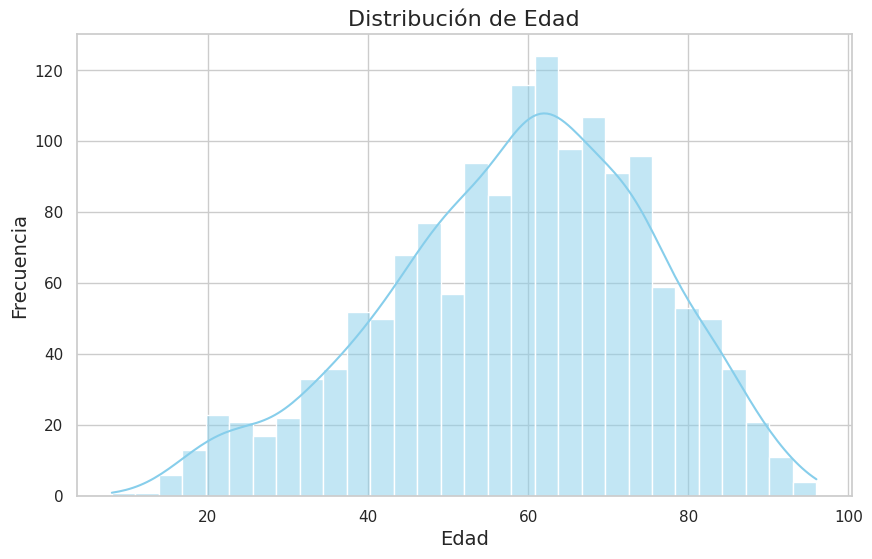

In [ ]:
# Histograma de edad
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_sin_ruta['Edad'], bins=30, kde=True, color="skyblue")
plt.title('Distribución de Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

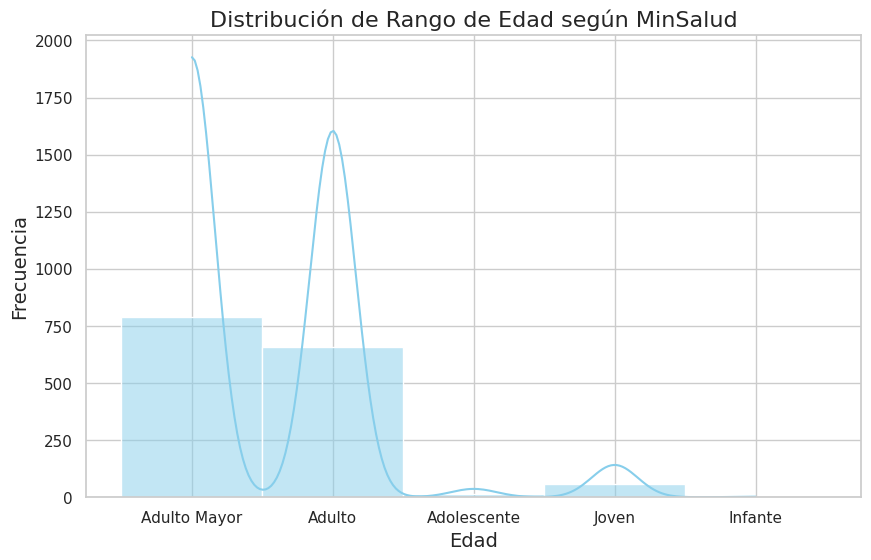

In [53]:
# Histograma de edad
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_sin_ruta['Rango_Edad_MinSalud'], bins=30, kde=True, color="skyblue")
plt.title('Distribución de Rango de Edad según MinSalud', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

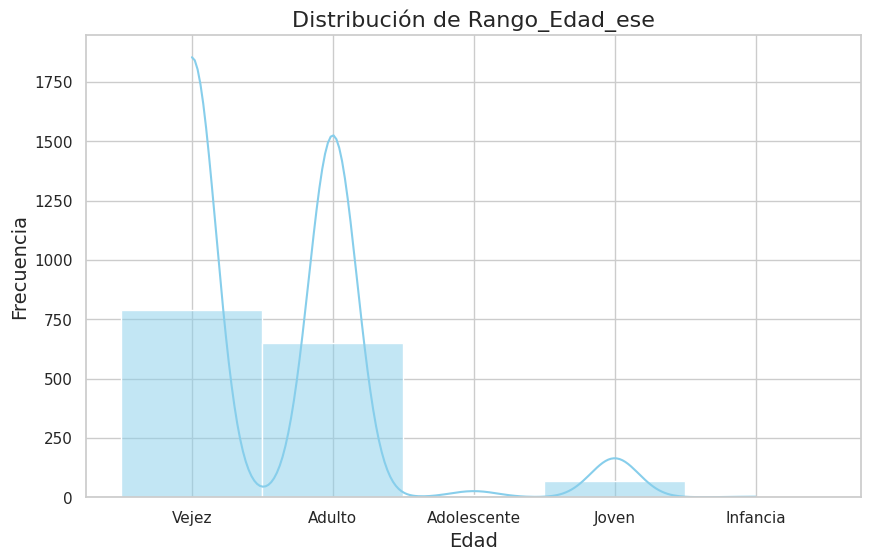

In [54]:
# Histograma de edad
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_sin_ruta['Rango_Edad_ese'], bins=30, kde=True, color="skyblue")
plt.title('Distribución de Rango_Edad_ese', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

➤ **Análisis por sexo**

In [55]:
# Distribución por sexo
sex_dist = pacientes_sin_ruta['Sexo'].value_counts(normalize=True)
print(sex_dist)

Sexo
F    0.668857
M    0.331143
Name: proportion, dtype: float64


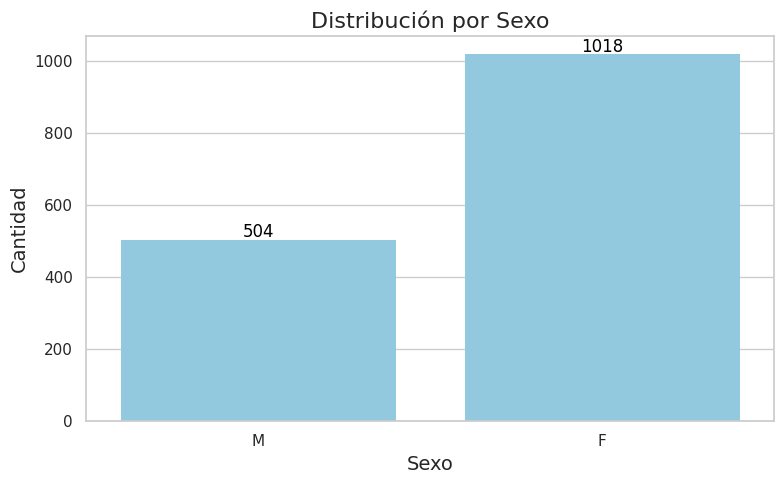

In [56]:
# Gráfico de barras por sexo
# Establecer el estilo estético de los gráficos
sns.set_theme(style="whitegrid", palette="pastel")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sexo', data=pacientes_sin_ruta, color='skyblue')

# Quitar bordes de las barras
for patch in ax.patches:
    patch.set_edgecolor('none')

# Título y etiquetas
plt.title('Distribución por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Añadir etiquetas sobre las barras
for p in ax.patches:
    # Usar el ancho de la barra y la posición x para centrar el texto
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 20
    value = '{:.0f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", va='center', fontsize=12, color='black')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

➤ **Tendencias de Ingresos por Mes**

<ipython-input-57-65ca8a450837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacientes_sin_ruta['Año_Mes'] = pacientes_sin_ruta['Fecha_Ingreso'].dt.to_period('M')


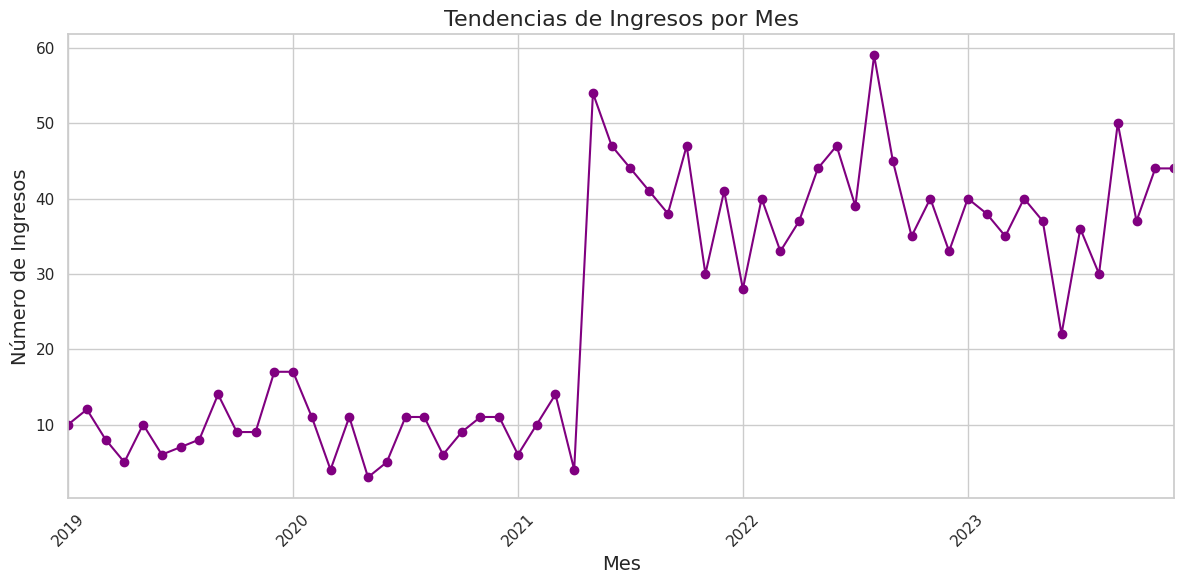

In [57]:
# Tendencias temporales
pacientes_sin_ruta['Año_Mes'] = pacientes_sin_ruta['Fecha_Ingreso'].dt.to_period('M')
ingresos_mensuales = pacientes_sin_ruta['Año_Mes'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ingresos_mensuales.plot(kind='line', color="purple", marker='o')
plt.title('Tendencias de Ingresos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Ingresos', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)  # Activar la grilla
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

➤ **Gráfico de la distribución del tipo de usuario**

1 =Contributivo
2 =Subsidiado
3 =Vinculado
4 =Particular
5 =Otro
6 =Víctima con afiliación al Régimen Contributivo
7 =Víctima con afiliación al Régimen subsidiado
8 =Víctima no asegurado (Vinculado)

<ipython-input-58-ead0bcb8ea68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Tipo_de_Usuario", data=pacientes_sin_ruta, palette="pastel")


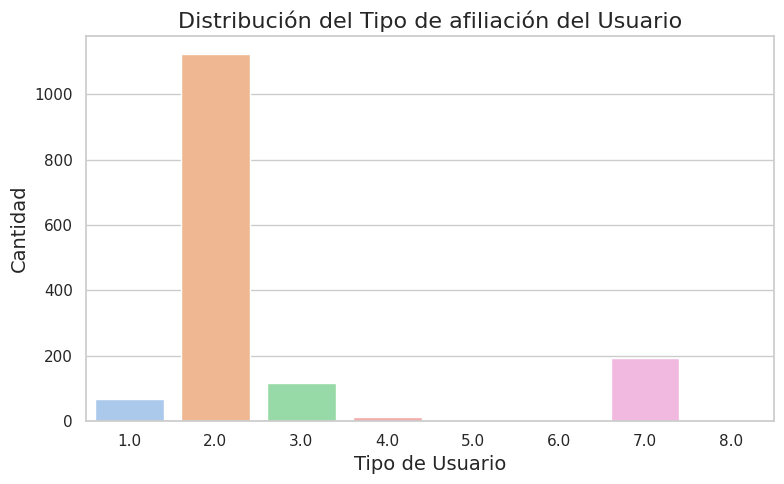

In [58]:
# Configuración inicial para la visualización del gráfico
plt.figure(figsize=(8, 5))

# Creación del gráfico de barras utilizando Seaborn
ax = sns.countplot(x="Tipo_de_Usuario", data=pacientes_sin_ruta, palette="pastel")

# Título y etiquetas
plt.title('Distribución del Tipo de afiliación del Usuario', fontsize=16)
plt.xlabel('Tipo de Usuario', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

➤  **Cálculo de la duración de la estancia en urgencias**

<ipython-input-59-1010512d57ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacientes_sin_ruta['Duracion_Estancia'] = (pacientes_sin_ruta['Fecha_Egreso'] - pacientes_sin_ruta['Fecha_Ingreso']).dt.total_seconds() / 3600


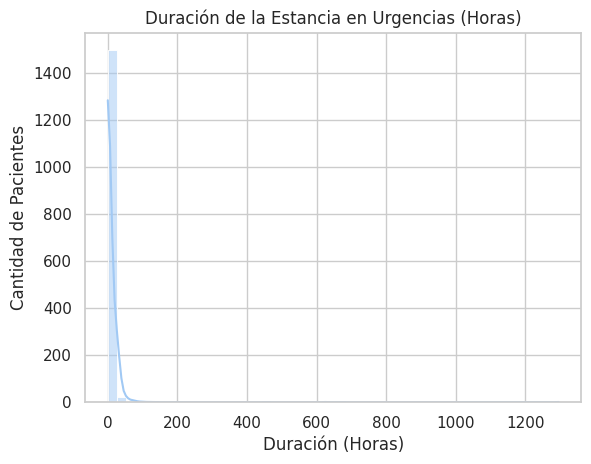

In [59]:
# Calcular la duración de la estancia en urgencias
pacientes_sin_ruta['Duracion_Estancia'] = (pacientes_sin_ruta['Fecha_Egreso'] - pacientes_sin_ruta['Fecha_Ingreso']).dt.total_seconds() / 3600
# Graficar la duración de la estancia
sns.histplot(data=pacientes_sin_ruta, x='Duracion_Estancia', bins=50, kde=True)
plt.title('Duración de la Estancia en Urgencias (Horas)')
plt.xlabel('Duración (Horas)')
plt.ylabel('Cantidad de Pacientes')
plt.show()

<ipython-input-60-7d3a07c2e376>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="nombre_Cod_PSS", data=pacientes_sin_ruta, palette="pastel")


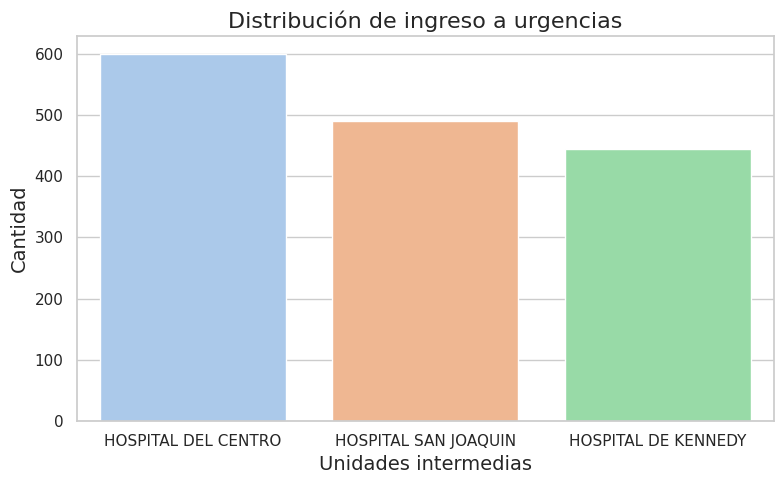

In [60]:
# Configuración inicial para la visualización del gráfico
plt.figure(figsize=(8, 5))

# Creación del gráfico de barras utilizando Seaborn
ax = sns.countplot(x="nombre_Cod_PSS", data=pacientes_sin_ruta, palette="pastel")

# Título y etiquetas
plt.title('Distribución de ingreso a urgencias', fontsize=16)
plt.xlabel('Unidades intermedias', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-61-b5ce0a64a5e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Destino_Usuario", data=pacientes_sin_ruta, palette="pastel", order=destinos.keys())
<ipython-input-61-b5ce0a64a5e1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([destinos[x] for x in destinos.keys()])


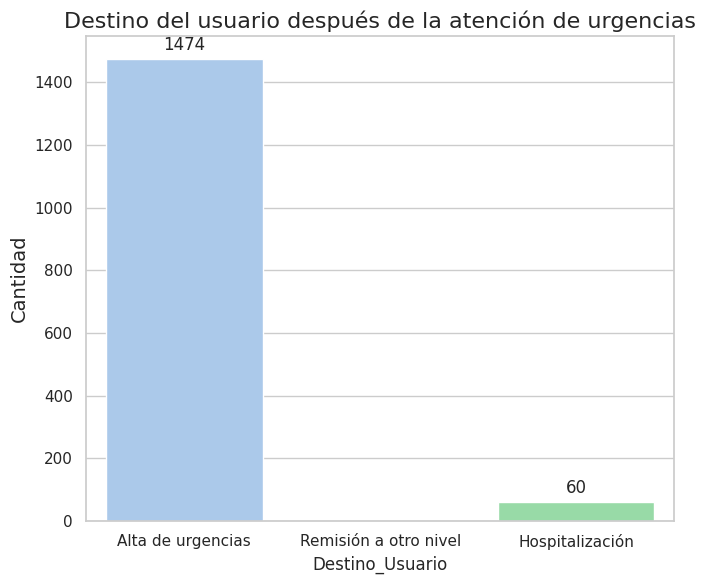

In [61]:
# Configuración inicial para la visualización del gráfico
plt.figure(figsize=(7, 6))
# Definir los destinos y sus etiquetas
destinos = {1: 'Alta de urgencias', 2: 'Remisión a otro nivel', 3: 'Hospitalización'}

ax = sns.countplot(x="Destino_Usuario", data=pacientes_sin_ruta, palette="pastel", order=destinos.keys())

# Asignar etiquetas a los ticks del eje x
ax.set_xticklabels([destinos[x] for x in destinos.keys()])

# Título y etiquetas
plt.title('Destino del usuario después de la atención de urgencias', fontsize=16)
plt.ylabel('Cantidad', fontsize=14)

# Anotar las cantidades en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-62-e42e5ba6e444>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Estado_Salida", data=pacientes_sin_ruta, palette="pastel", order=Salida.keys())
<ipython-input-62-e42e5ba6e444>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([Salida[x] for x in Salida.keys()])


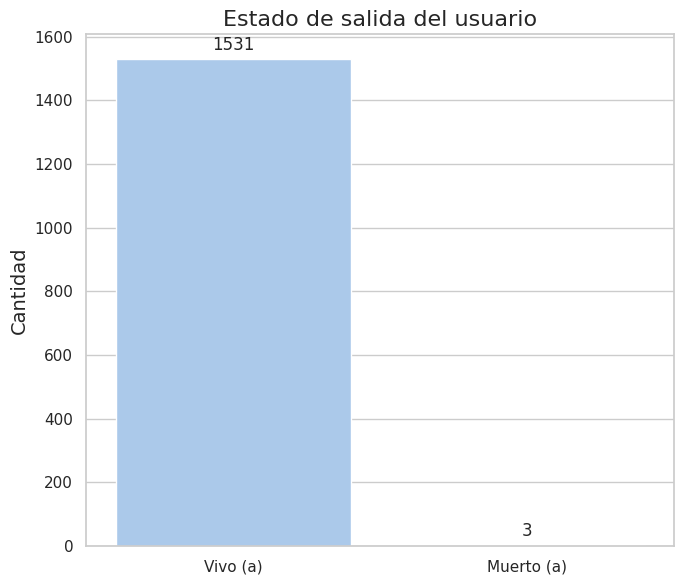

In [62]:
# Configuración inicial para la visualización del gráfico
plt.figure(figsize=(7, 6))
# Definir los destinos y sus etiquetas
Salida = {1: 'Vivo (a)', 2: 'Muerto (a)'}
ax = sns.countplot(x="Estado_Salida", data=pacientes_sin_ruta, palette="pastel", order=Salida.keys())

# Set x-axis tick labels
ax.set_xticklabels([Salida[x] for x in Salida.keys()])

# Add plot title and labels
plt.title('Estado de salida del usuario', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Annotate the bar heights
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Final adjustments and display the plot
plt.tight_layout()
plt.show()

<ipython-input-63-b60aa66e4f9c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Zona_Residencia", data=pacientes_sin_ruta, palette="pastel")


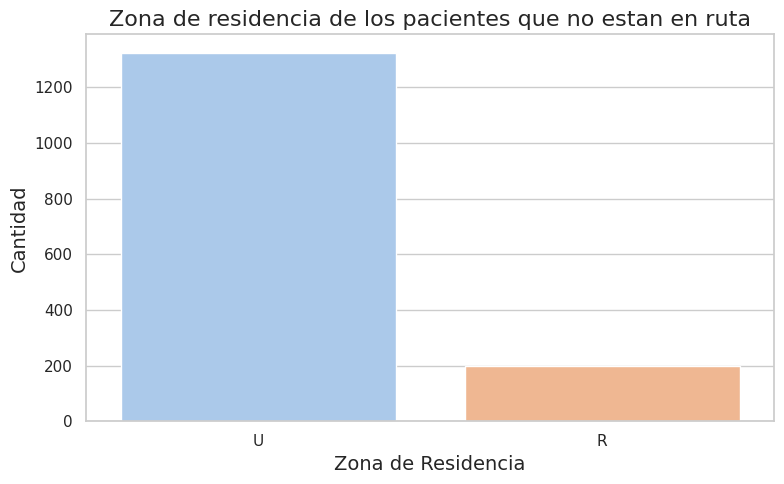

In [63]:
# Configuración inicial para la visualización del gráfico
plt.figure(figsize=(8, 5))

# Creación del gráfico de barras utilizando Seaborn
ax = sns.countplot(x="Zona_Residencia", data=pacientes_sin_ruta, palette="pastel")

# Título y etiquetas
plt.title('Zona de residencia de los pacientes que no estan en ruta', fontsize=16)
plt.xlabel('Zona de Residencia', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##**1.5.1 Policonsultantes críticos**

In [64]:
#PACIENTES POLICONSULTANTES QUE INGRESARON A URGENCIAS CON DIAGNOSTICOS OBJETIVO
# Copia del DataFrame para evitar cambios no deseados en el original
us_au_dx_obj_copia = us_au_dx_obj.copy()

# Se extrae año y mes de la Fecha_Ingreso
us_au_dx_obj_copia.loc[:, 'Año'] = us_au_dx_obj_copia['Fecha_Ingreso'].dt.year
us_au_dx_obj_copia.loc[:, 'Mes'] = us_au_dx_obj_copia['Fecha_Ingreso'].dt.month

#Se grupa por año, mes y número de identificación del usuario, contando los ingresos
ingresos_por_mes = us_au_dx_obj_copia.groupby(['Año', 'Mes', 'No_Id_Usuario']).size().reset_index(name='Ingresos')

# filtramos los usuarios con tres o más ingresos en un mes
policonsultantes = ingresos_por_mes[ingresos_por_mes['Ingresos'] >= 3]

#se ordenan los resultados de forma ascendente por año y mes
policonsultantes_ordenados = policonsultantes.sort_values(by=['Año', 'Mes'])

print(policonsultantes_ordenados)

       Año  Mes No_Id_Usuario  Ingresos
263   2021    3      25045999         3
1197  2022   12      24945703         3
1335  2023    3      40771855         3
1674  2023   11      12580397         3


In [65]:
#verificamos si los pacientes policonsultantes están en la lista de pacientes que no están en la ruta de hipertensión y diabetes
policonsultantes_en_sin_ruta = policonsultantes_ordenados.merge(pacientes_sin_ruta,
                                                               how='inner',
                                                               left_on='No_Id_Usuario',
                                                               right_on='No_Id_Usuario')

# Mostrar los pacientes policonsultantes que están en pacientes_sin_ruta
policonsultantes_en_sin_ruta

,Año,Mes,No_Id_Usuario,Ingresos,Tipo_Id_Usuario,Cod_EPS,Tipo_de_Usuario,1er_Apellido,2do_Apellido,1er_Nombre,...,Dx_Egreso,Dx1,Dx2,Destino_Usuario,Estado_Salida,Causa_Muerte,Fecha_Egreso,Hora_Egreso,Año_Mes,Duracion_Estancia
0,2021,3,25045999,3,CC,ESS062,2.0,TAPASCO,TREJOS,MARIA,...,I10X,NaN,NaN,1,1,NaN,2021-03-26,0 days 00:09:00,2021-03,24.0
1,2022,12,24945703,3,CC,ESS062,2.0,MONCADA,SANCHEZ,YOLANDA,...,I10X,NaN,NaN,1,1,NaN,2022-12-17,0 days 21:25:00,2022-12,0.0
2,2023,3,40771855,3,CC,ESS062,2.0,AGUDELO,OSPINA,BERTINA,...,I10X,NaN,NaN,1,1,NaN,2023-03-01,0 days 20:20:00,2023-03,0.0
3,2023,11,12580397,3,CC,ESSC07,1.0,NARVADEZ,NARVADEZ,GRATINIANO,...,E119,NaN,NaN,1,1,NaN,2023-11-18,0 days 02:12:00,2023-11,24.0


In [ ]:
"""
# Evolución de ingresos en el tiempo

# Convertir el campo 'Fecha_Ingreso' a formato de fecha
obj1_fin['Fecha_Ingreso'] = pd.to_datetime(obj1_fin['Fecha_Ingreso'], format='%d-%m-%Y')

# Extraer el año y el mes de cada fecha
obj1_fin['Año'] = obj1_fin['Fecha_Ingreso'].dt.year
obj1_fin['Mes'] = obj1_fin['Fecha_Ingreso'].dt.month

# Crear un gráfico de barras para la cantidad de ingresos mensuales por cada año
g = sns.catplot(data=obj1_fin, x='Mes', kind='count', col='Año', col_wrap=3, height=4)

# Ajustar los títulos de los subplots
g.set_titles("Ingresos Mensuales en el Año {col_name}")

plt.show()
"""


'\n# Evolución de ingresos en el tiempo\n\n# Convertir el campo \'Fecha_Ingreso\' a formato de fecha\nobj1_fin[\'Fecha_Ingreso\'] = pd.to_datetime(obj1_fin[\'Fecha_Ingreso\'], format=\'%d-%m-%Y\')\n\n# Extraer el año y el mes de cada fecha\nobj1_fin[\'Año\'] = obj1_fin[\'Fecha_Ingreso\'].dt.year\nobj1_fin[\'Mes\'] = obj1_fin[\'Fecha_Ingreso\'].dt.month\n\n# Crear un gráfico de barras para la cantidad de ingresos mensuales por cada año\ng = sns.catplot(data=obj1_fin, x=\'Mes\', kind=\'count\', col=\'Año\', col_wrap=3, height=4)\n\n# Ajustar los títulos de los subplots\ng.set_titles("Ingresos Mensuales en el Año {col_name}")\n\nplt.show()\n'

In [ ]:
"""
# Comparación entre hombres y mujeres
obj1_fin.groupby(by='Sexo')['No_Id_Usuario'].count()
"""

"\n# Comparación entre hombres y mujeres\nobj1_fin.groupby(by='Sexo')['No_Id_Usuario'].count()\n"

In [ ]:
"""
# De acuerdo a información suministrada por la Entidad, un policonsultante se considera crítico si tiene más de tres (3) consultas por diangósticos relacionados.
policonsultantescriticos = cantidad_ingresos_por_usuario[cantidad_ingresos_por_usuario['Cantidad_Ingresos'] >= 3].sort_values(by = 'Cantidad_Ingresos', ascending=False)
policonsultantescriticos
"""

"\n# De acuerdo a información suministrada por la Entidad, un policonsultante se considera crítico si tiene más de tres (3) consultas por diangósticos relacionados.\npoliconsultantescriticos = cantidad_ingresos_por_usuario[cantidad_ingresos_por_usuario['Cantidad_Ingresos'] >= 3].sort_values(by = 'Cantidad_Ingresos', ascending=False)\npoliconsultantescriticos\n"

In [ ]:
"""
print ('La cantidad de usuarios policonsultantes críticos es: ', len(policonsultantescriticos))
"""

"\nprint ('La cantidad de usuarios policonsultantes críticos es: ', len(policonsultantescriticos))\n"

##**2.0 Analisis de la base de dstos RCV (RUTA CARDIOVASCULAR)**